# HOME -LLC ASSIGNMENT

##### importing the liabraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns

from scipy.stats import zscore                               
from sklearn.preprocessing import StandardScaler                    
from sklearn.preprocessing import MinMaxScaler                       

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics, model_selection                         
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve, precision_recall_curve

from sklearn.model_selection import train_test_split, GridSearchCV    
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

%matplotlib inline
sns.set(color_codes=True)
sns.set_palette('Accent_r')

%config InlineBackend.figure_format ='retina'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [2]:
Data = pd.read_excel('HomeLLCData.xlsx')

In [3]:
Data.head()

,observation_date,Unemployment_RATE,GDP,PERMIT,POPTHM,Recession,house_tax,TTLCONS,Life_expectancy,MORTGAGE_RATE_US,CPI,Home_price_Index
0,2000-01-01,3.966667,10250.95200,1598.333333,282398.416667,0,681,803704.500000,76.636585,8.053462,169.575000,104.777000
1,2001-01-01,4.741667,10581.92900,1637.166667,285225.166667,1,696,839778.333333,76.836585,6.967885,176.350000,113.185500
2,2002-01-01,5.783333,10929.10825,1749.000000,287954.583333,0,626,848339.500000,76.936585,6.537308,180.258333,122.287667
3,2003-01-01,5.991667,11456.44950,1888.416667,290626.250000,0,611,890520.833333,77.036585,5.826981,184.800000,133.741500
4,2004-01-01,5.541667,12217.19575,2057.583333,293262.333333,0,595,989220.000000,77.487805,5.839231,189.541667,150.464333


Above data showing first 5 rows of our data set

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   observation_date   23 non-null     datetime64[ns]
 1   Unemployment_RATE  23 non-null     float64       
 2   GDP                23 non-null     float64       
 3   PERMIT             23 non-null     float64       
 4   POPTHM             23 non-null     float64       
 5   Recession          23 non-null     int64         
 6   house_tax          23 non-null     int64         
 7   TTLCONS            23 non-null     float64       
 8   Life_expectancy    22 non-null     float64       
 9   MORTGAGE_RATE_US   23 non-null     float64       
 10  CPI                23 non-null     float64       
 11  Home_price_Index   23 non-null     float64       
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 2.3 KB


Above data shown info of data set

In [5]:
Data.shape

(23, 12)

Above data shown shape of our data set like how many rows and column in data set

In [6]:
Data.isnull().sum()

observation_date     0
Unemployment_RATE    0
GDP                  0
PERMIT               0
POPTHM               0
Recession            0
house_tax            0
TTLCONS              0
Life_expectancy      1
MORTGAGE_RATE_US     0
CPI                  0
Home_price_Index     0
dtype: int64

We seen from above data that null value is reperesent in our data we need to impute the null value

In [7]:
Data1 = Data.copy()

In [8]:
Data1.head()

,observation_date,Unemployment_RATE,GDP,PERMIT,POPTHM,Recession,house_tax,TTLCONS,Life_expectancy,MORTGAGE_RATE_US,CPI,Home_price_Index
0,2000-01-01,3.966667,10250.95200,1598.333333,282398.416667,0,681,803704.500000,76.636585,8.053462,169.575000,104.777000
1,2001-01-01,4.741667,10581.92900,1637.166667,285225.166667,1,696,839778.333333,76.836585,6.967885,176.350000,113.185500
2,2002-01-01,5.783333,10929.10825,1749.000000,287954.583333,0,626,848339.500000,76.936585,6.537308,180.258333,122.287667
3,2003-01-01,5.991667,11456.44950,1888.416667,290626.250000,0,611,890520.833333,77.036585,5.826981,184.800000,133.741500
4,2004-01-01,5.541667,12217.19575,2057.583333,293262.333333,0,595,989220.000000,77.487805,5.839231,189.541667,150.464333


Visualizing missing values

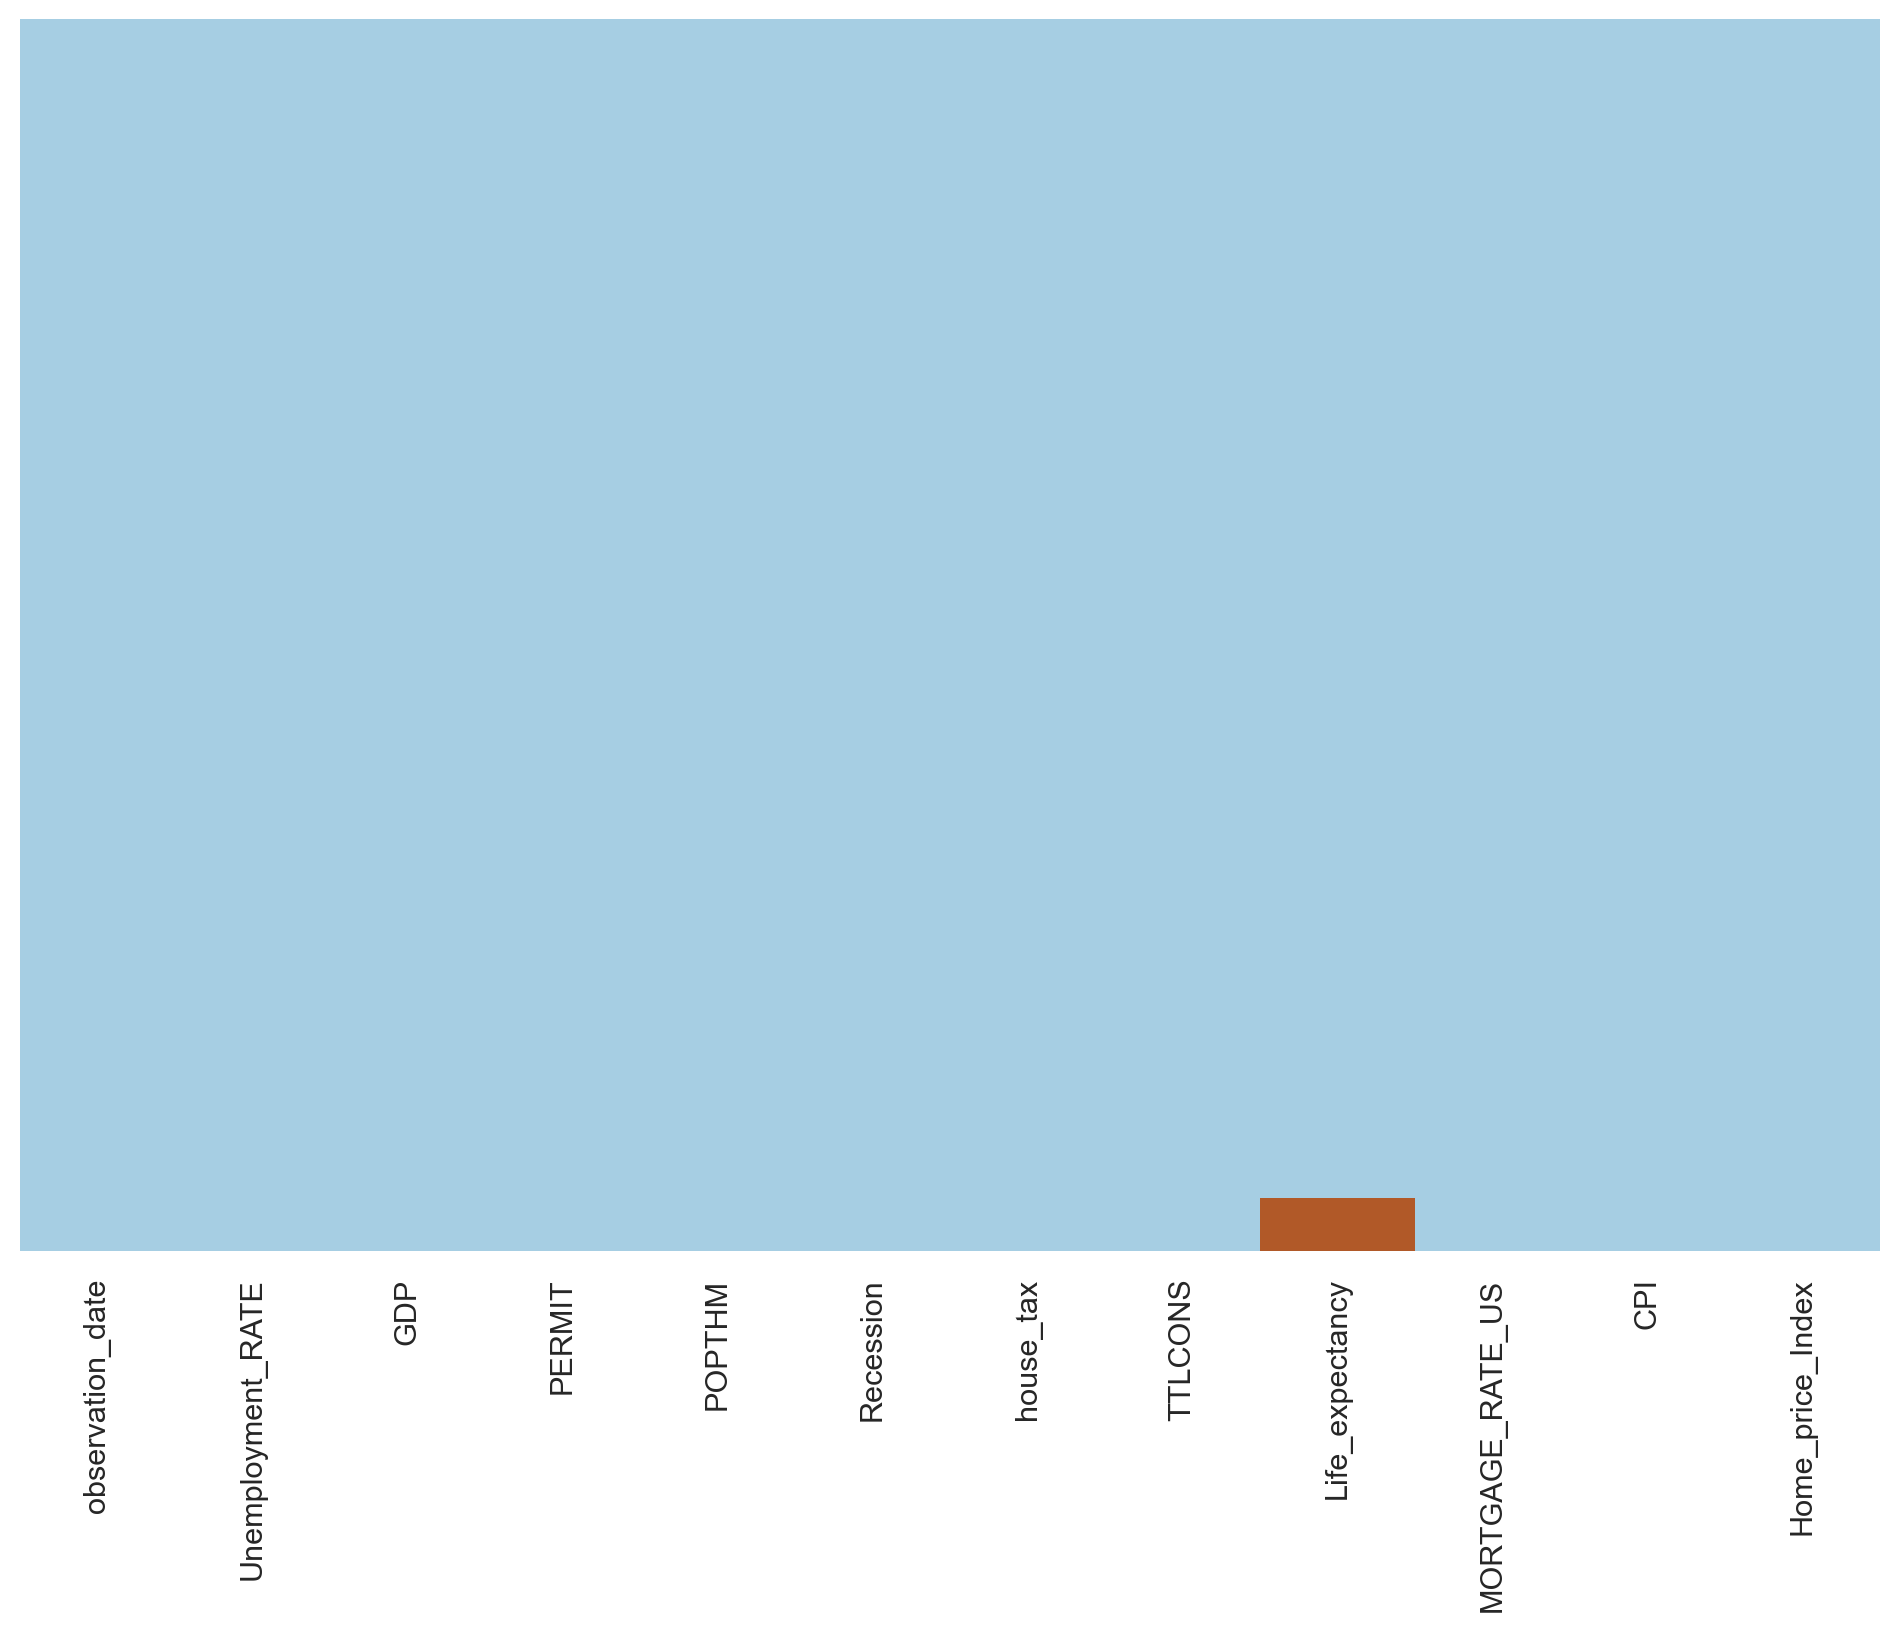

In [9]:
plt.figure(figsize = (12,8))
sns.heatmap(Data1.isnull(), cbar = False, cmap = 'Paired', yticklabels = False)
plt.show();

In [10]:
for column in Data1.columns:
    if Data1[column].dtype == 'float64':
        median = Data1[column].median()
        Data1[column] = Data1[column].fillna(median)    
        
Data1.isnull().sum()  

observation_date     0
Unemployment_RATE    0
GDP                  0
PERMIT               0
POPTHM               0
Recession            0
house_tax            0
TTLCONS              0
Life_expectancy      0
MORTGAGE_RATE_US     0
CPI                  0
Home_price_Index     0
dtype: int64

Visualizing missing values After Treating Missing Values

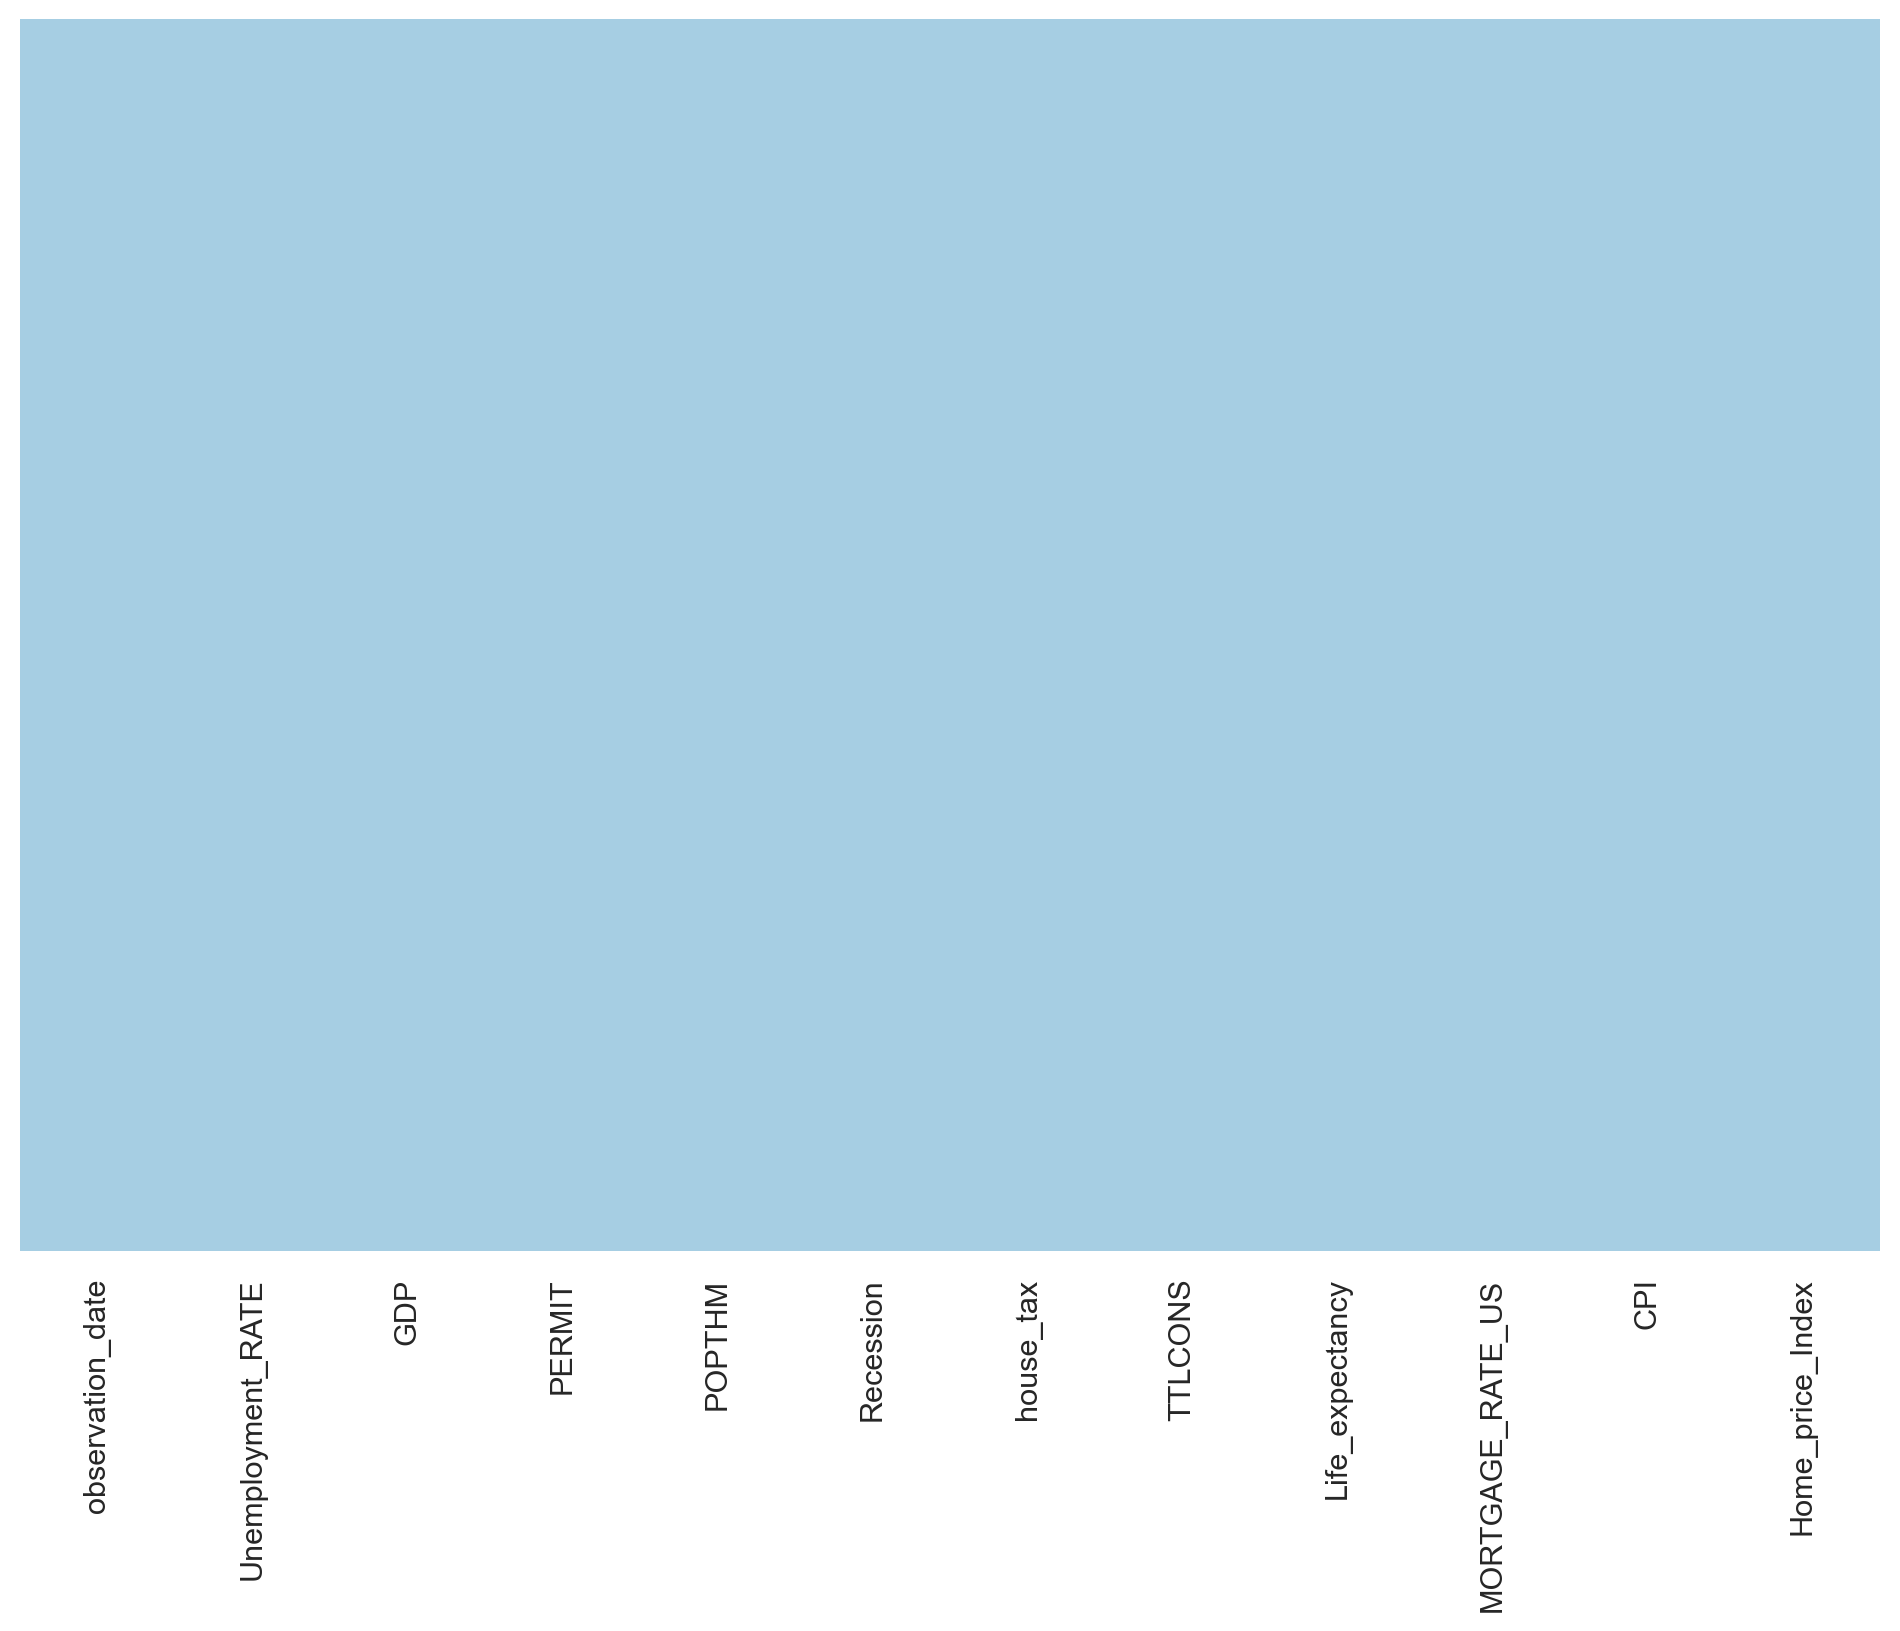

In [11]:
plt.figure(figsize = (12,8))
sns.heatmap(Data1.isnull(), cbar = False, cmap = 'Paired', yticklabels = False)
plt.show();

observation _date column in not necessary

so that we can drop the column


In [12]:
Data1.drop("observation_date", axis=1, inplace = True)
Data1.head()

,Unemployment_RATE,GDP,PERMIT,POPTHM,Recession,house_tax,TTLCONS,Life_expectancy,MORTGAGE_RATE_US,CPI,Home_price_Index
0,3.966667,10250.95200,1598.333333,282398.416667,0,681,803704.500000,76.636585,8.053462,169.575000,104.777000
1,4.741667,10581.92900,1637.166667,285225.166667,1,696,839778.333333,76.836585,6.967885,176.350000,113.185500
2,5.783333,10929.10825,1749.000000,287954.583333,0,626,848339.500000,76.936585,6.537308,180.258333,122.287667
3,5.991667,11456.44950,1888.416667,290626.250000,0,611,890520.833333,77.036585,5.826981,184.800000,133.741500
4,5.541667,12217.19575,2057.583333,293262.333333,0,595,989220.000000,77.487805,5.839231,189.541667,150.464333


# EDA

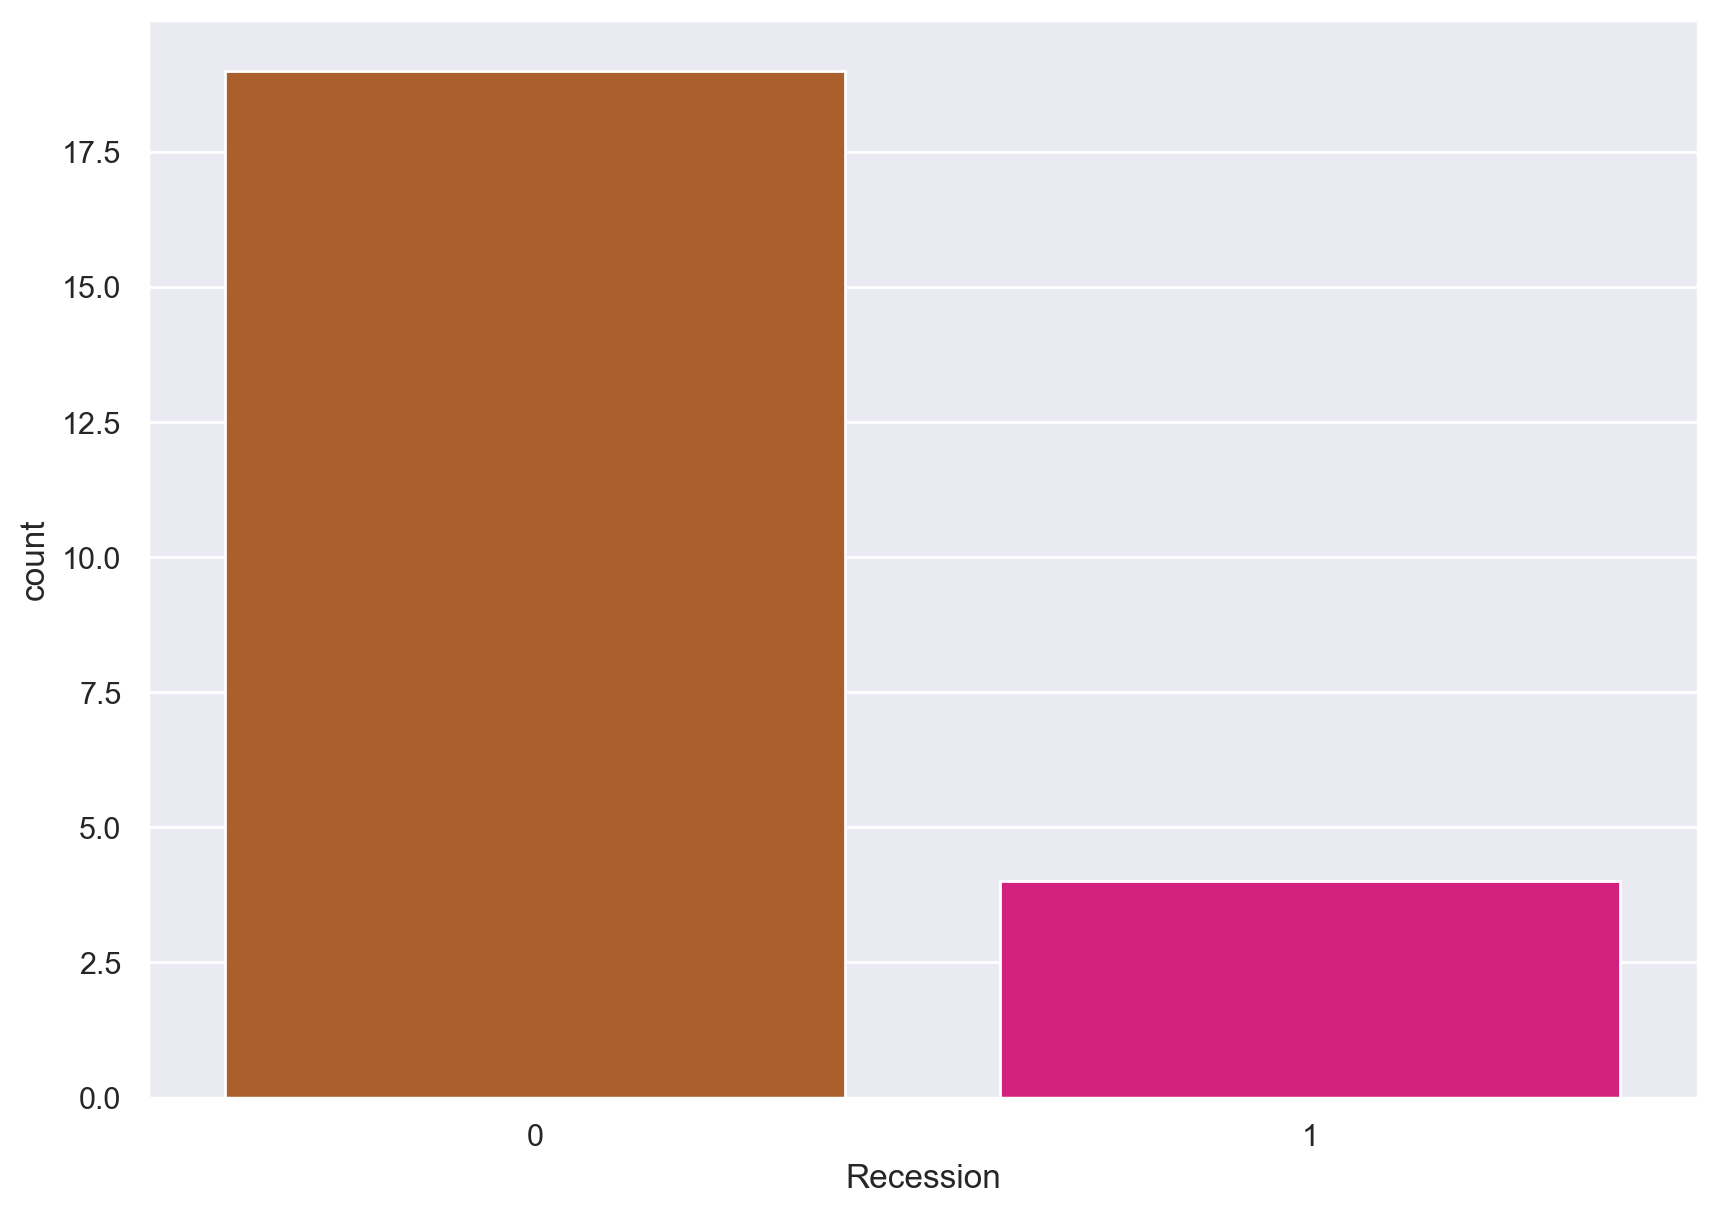

In [13]:
plt.figure(figsize = (10,7))
sns.countplot(data=Data1, x='Recession')
Data1['Recession'].value_counts();

Above data represent recession happens in past 20 years

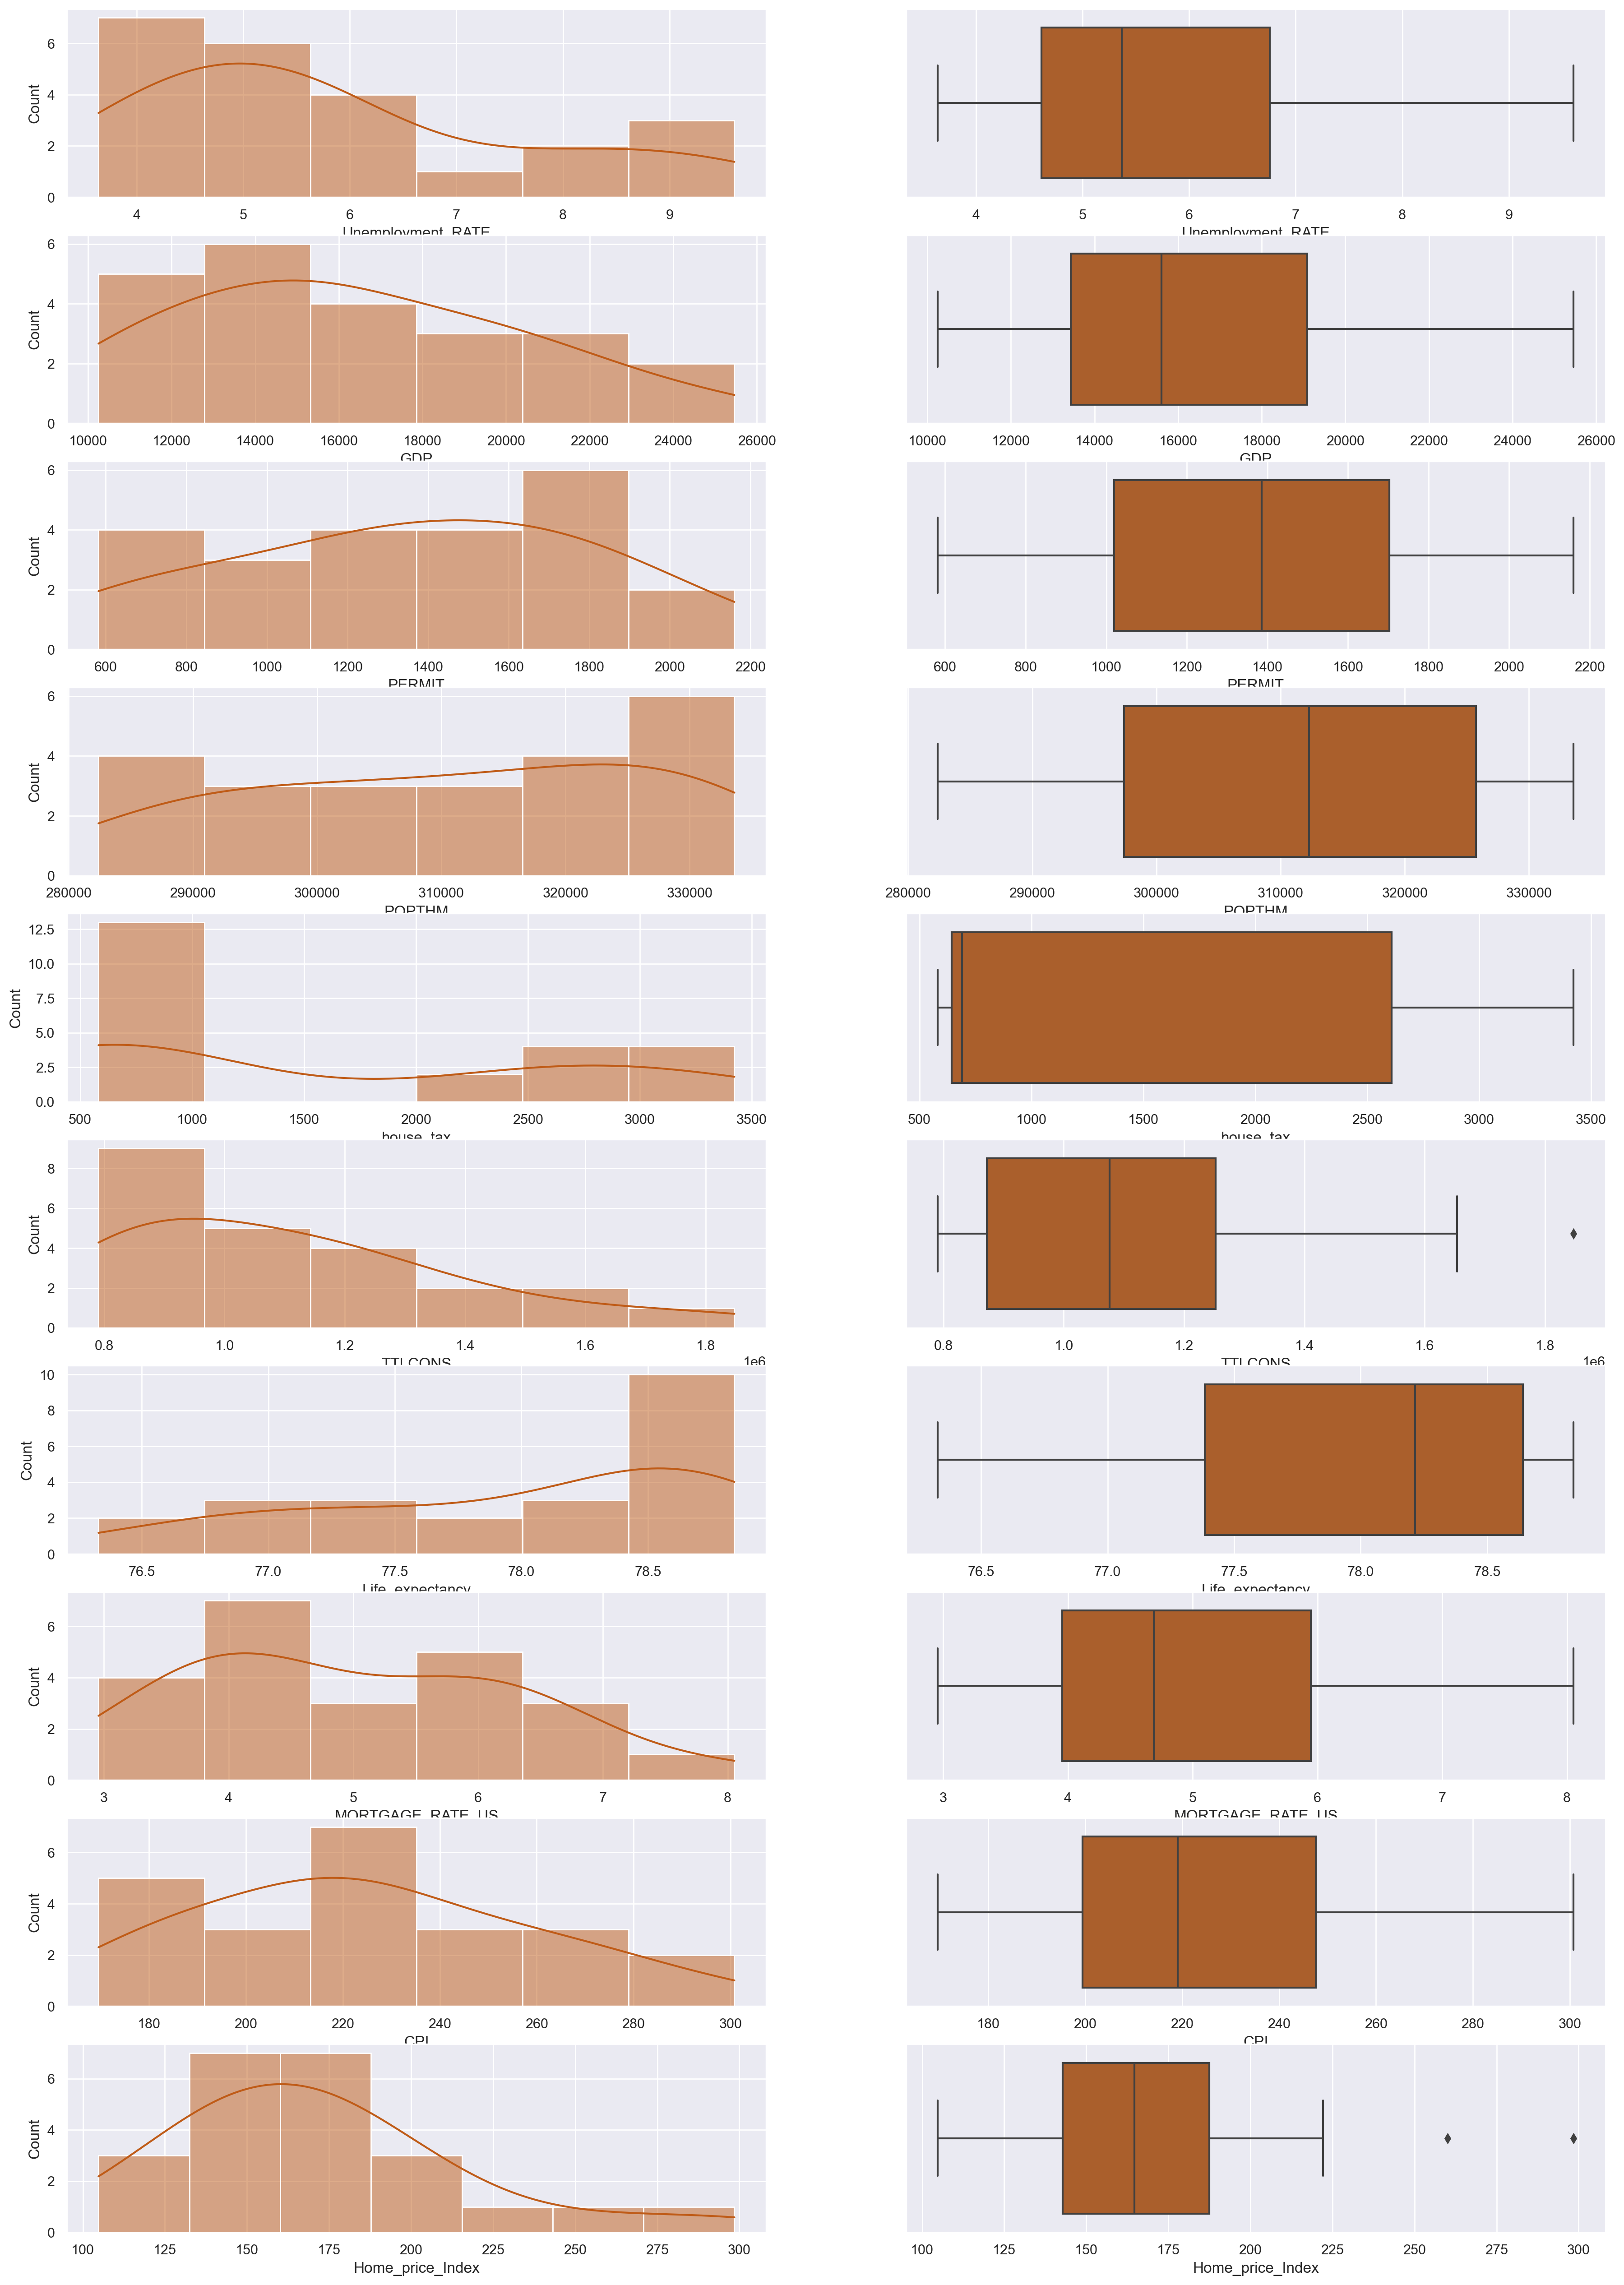

In [14]:
fig, axes = plt.subplots(nrows=10,ncols=2)
fig.set_size_inches(22,32)

sns.histplot(Data1['Unemployment_RATE'], kde=True, ax=axes[0][0])
sns.boxplot(x='Unemployment_RATE', data=Data1, ax=axes[0][1])


sns.histplot(Data1['GDP'] , kde=True, ax=axes[1][0])
sns.boxplot(x='GDP', data=Data1, ax=axes[1][1])


sns.histplot(Data1['PERMIT'] , kde=True, ax=axes[2][0])
sns.boxplot(x='PERMIT', data=Data1 , ax=axes[2][1])

sns.histplot(Data1['POPTHM'] , kde=True, ax=axes[3][0])
sns.boxplot(x='POPTHM', data=Data1 , ax=axes[3][1])

sns.histplot(Data1['house_tax'] , kde=True, ax=axes[4][0])
sns.boxplot(x='house_tax', data=Data1, ax=axes[4][1])

sns.histplot(Data1['TTLCONS'] , kde=True, ax=axes[5][0])
sns.boxplot(x='TTLCONS', data=Data1, ax=axes[5][1])

sns.histplot(Data1['Life_expectancy'] , kde=True, ax=axes[6][0])
sns.boxplot(x='Life_expectancy', data=Data1, ax=axes[6][1])

sns.histplot(Data1['MORTGAGE_RATE_US'] , kde=True, ax=axes[7][0])
sns.boxplot(x='MORTGAGE_RATE_US', data=Data1, ax=axes[7][1])

sns.histplot(Data1['CPI'] , kde=True, ax=axes[8][0])
sns.boxplot(x='CPI', data=Data1, ax=axes[8][1])

sns.histplot(Data1['Home_price_Index'] , kde=True, ax=axes[9][0])
sns.boxplot(x='Home_price_Index', data=Data1, ax=axes[9][1])

plt.show();

Above histogram data showns how various factors represents past 20 years like increase or decrease of moratgage rate , Total construction cost,GDP,Unempolyment rate and from box plot we can able to find that outlier present in our data we need to treat the outlier before proceeding with data to build model

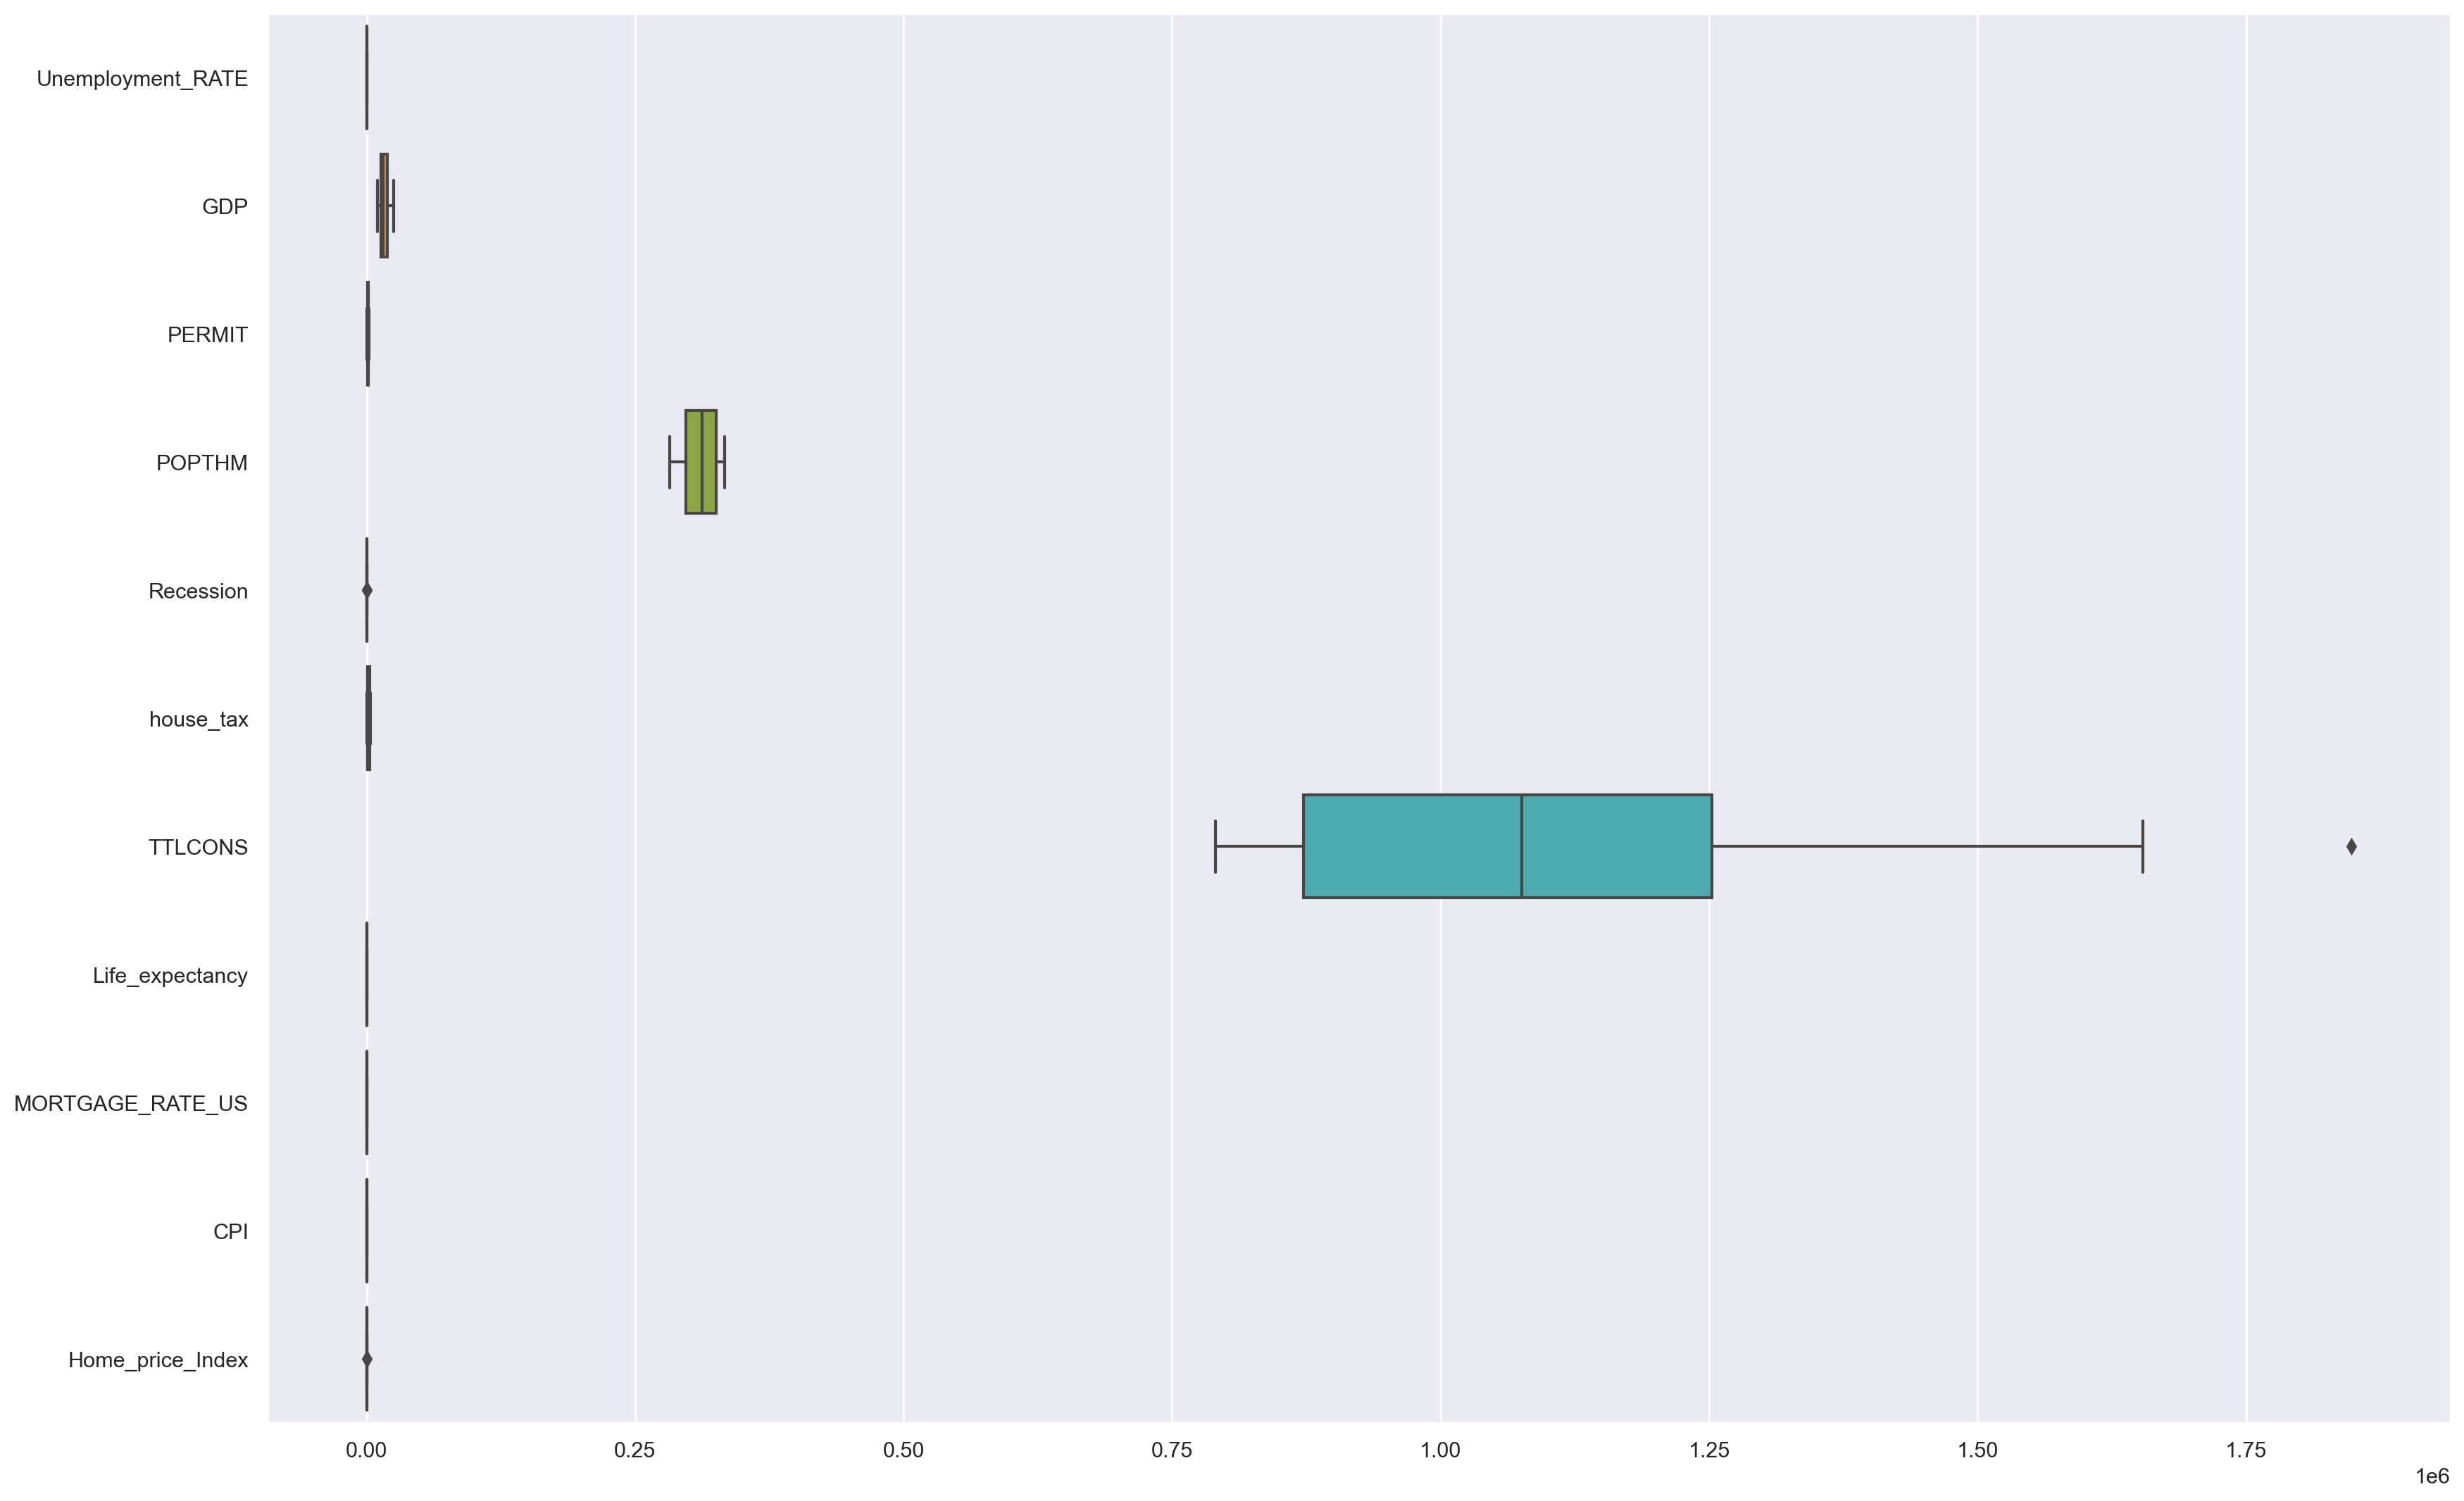

In [16]:
plt.figure(figsize = (20,13))
sns.boxplot(data = Data1 , orient = 'h');

Before Treatment of outlier

<AxesSubplot:xlabel='Unemployment_RATE'>

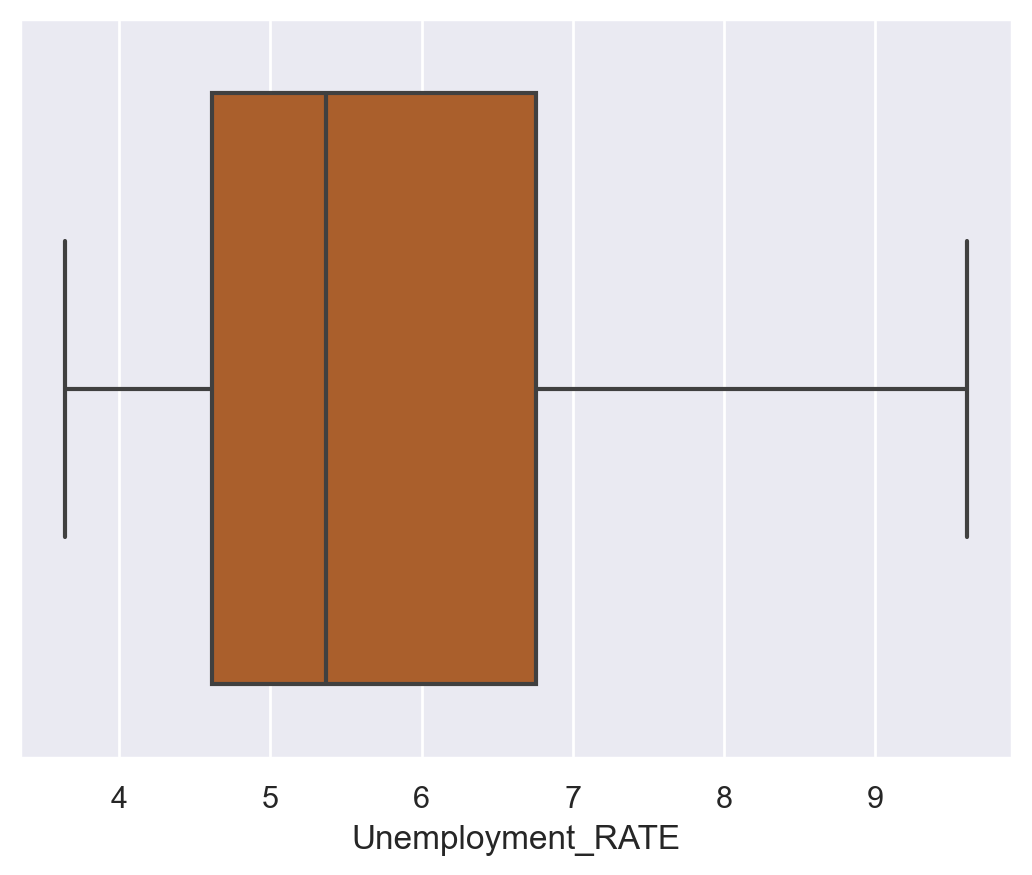

<AxesSubplot:xlabel='GDP'>

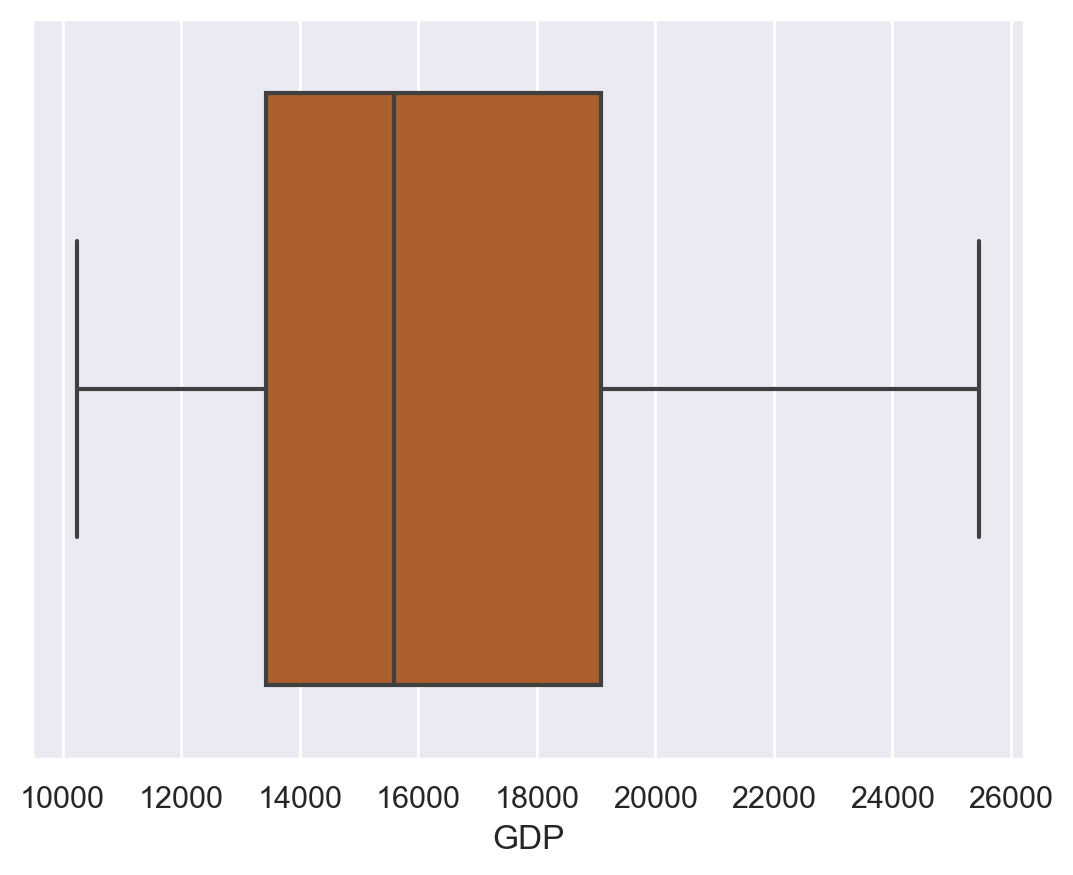

<AxesSubplot:xlabel='POPTHM'>

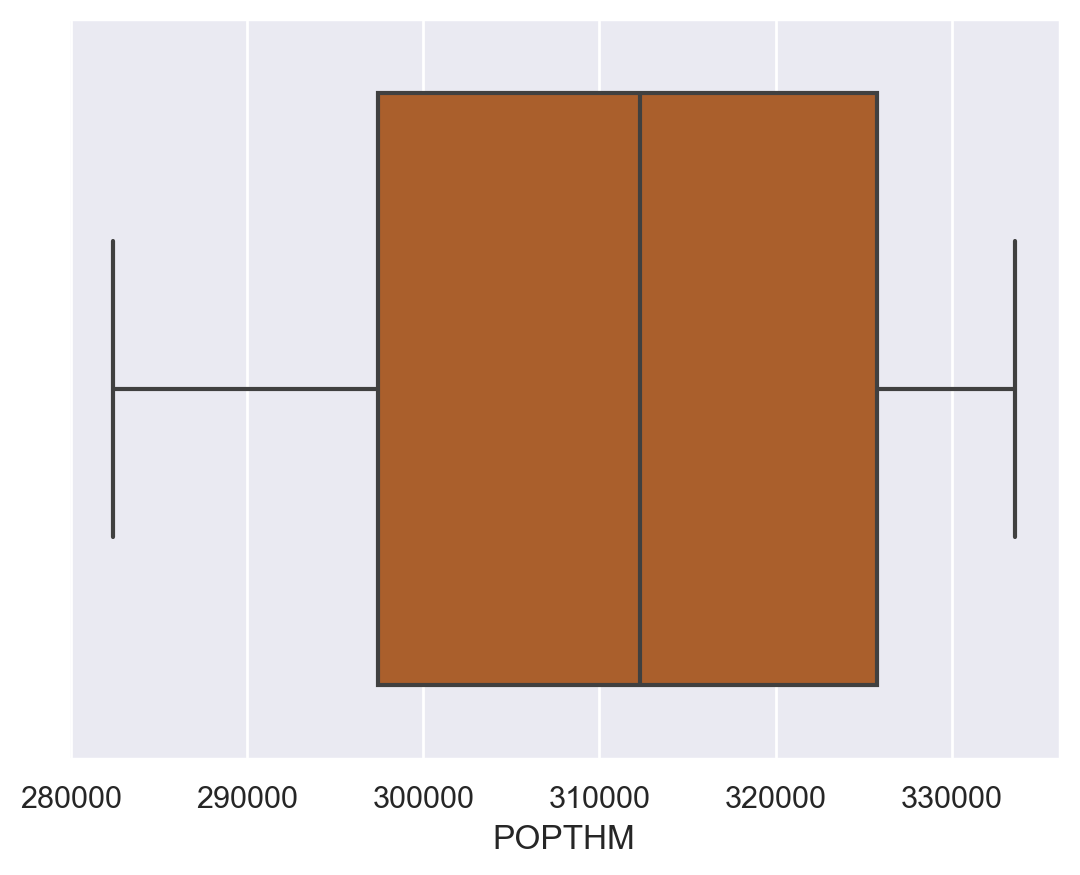

<AxesSubplot:xlabel='house_tax'>

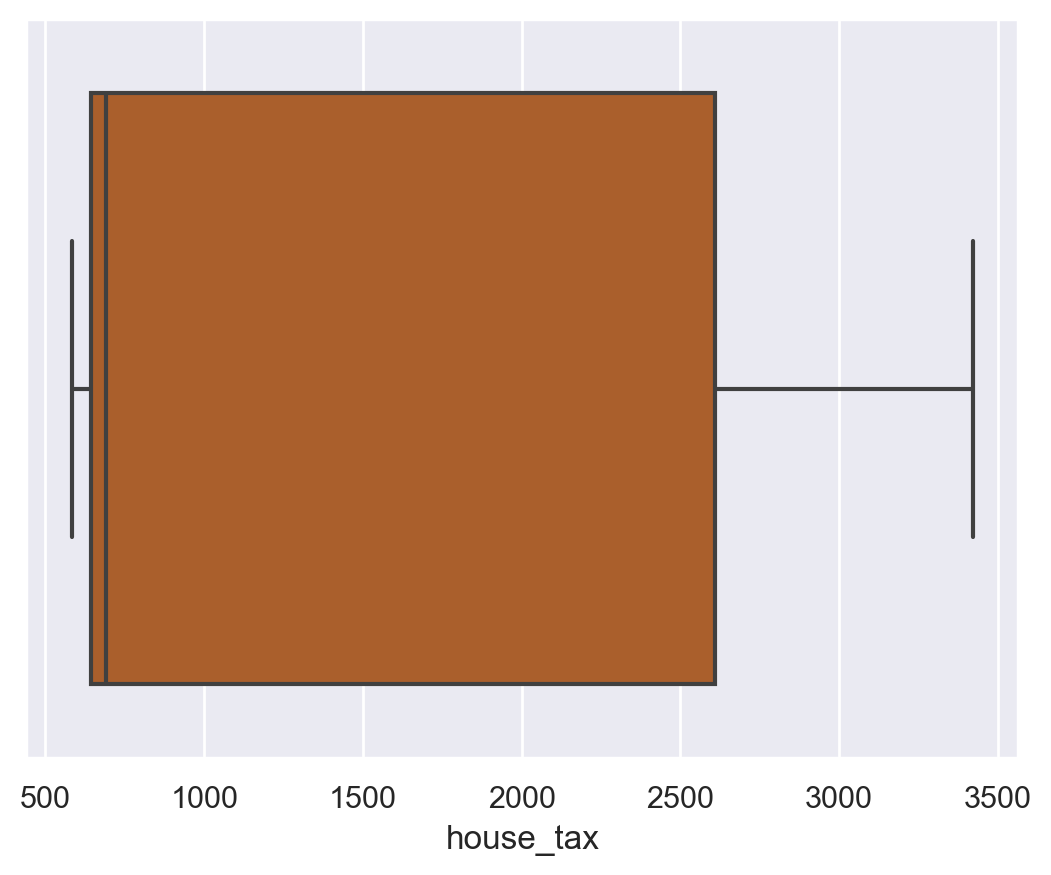

<AxesSubplot:xlabel='TTLCONS'>

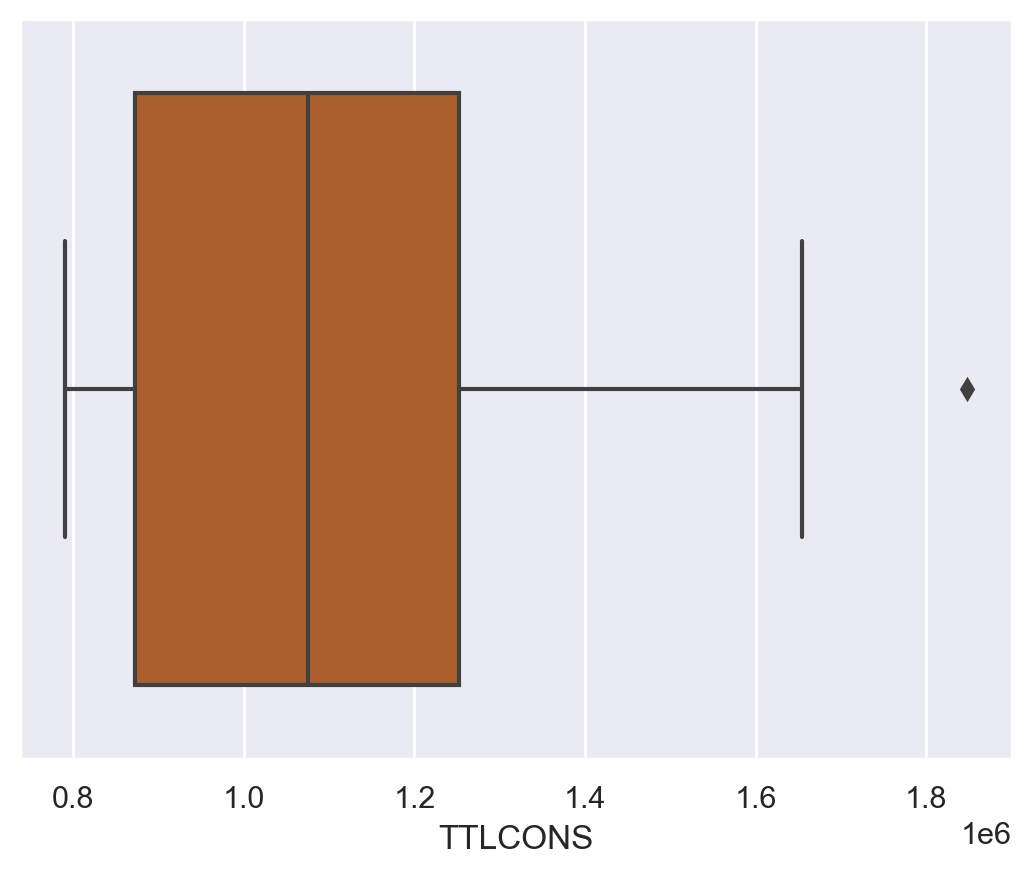

<AxesSubplot:xlabel='Life_expectancy'>

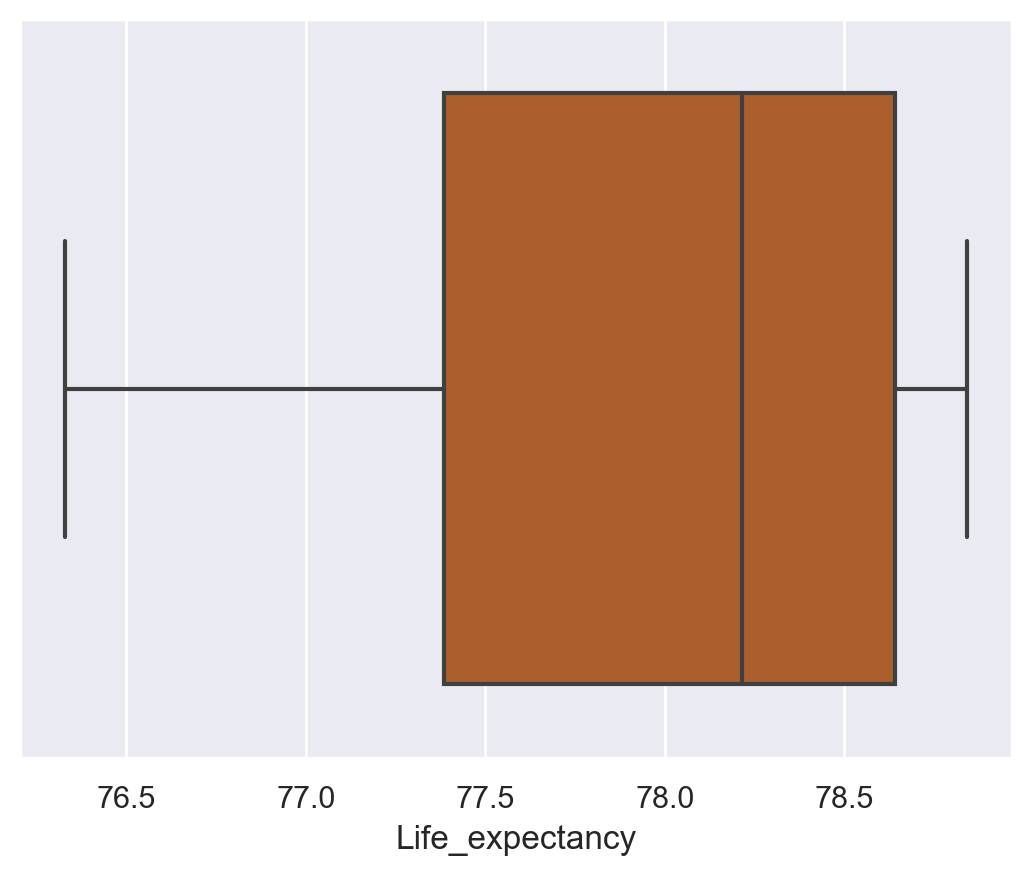

<AxesSubplot:xlabel='MORTGAGE_RATE_US'>

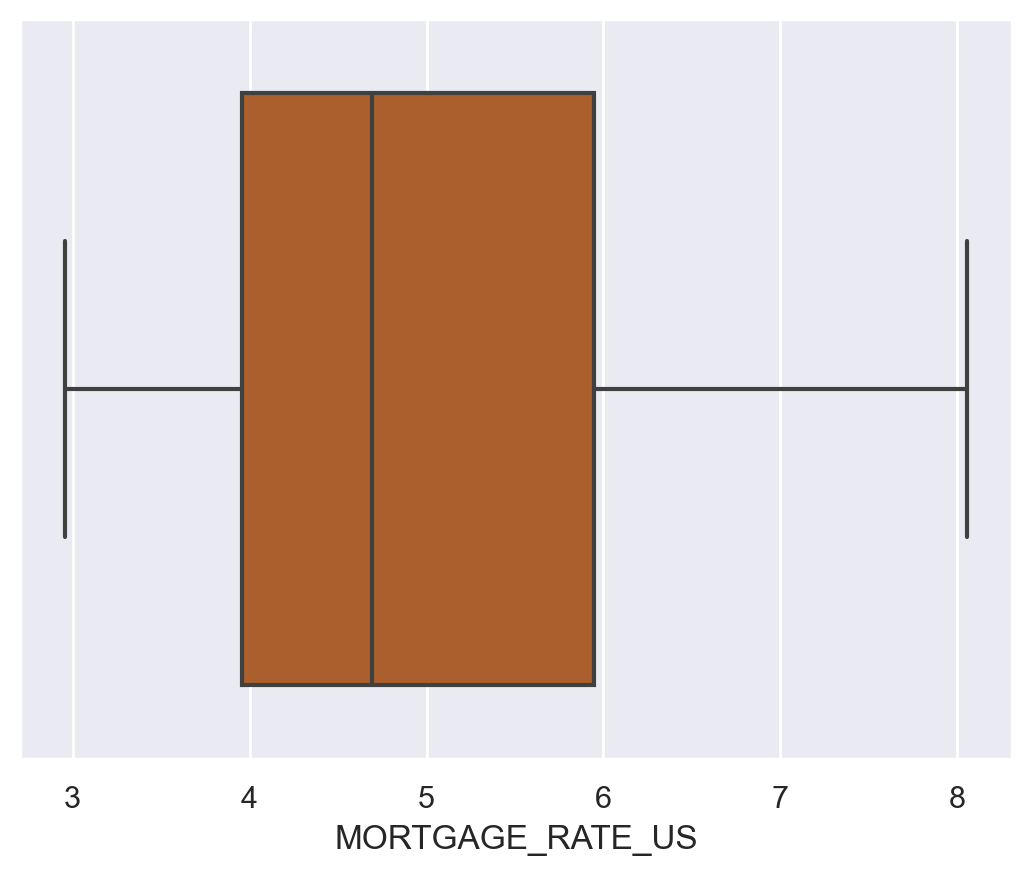

<AxesSubplot:xlabel='CPI'>

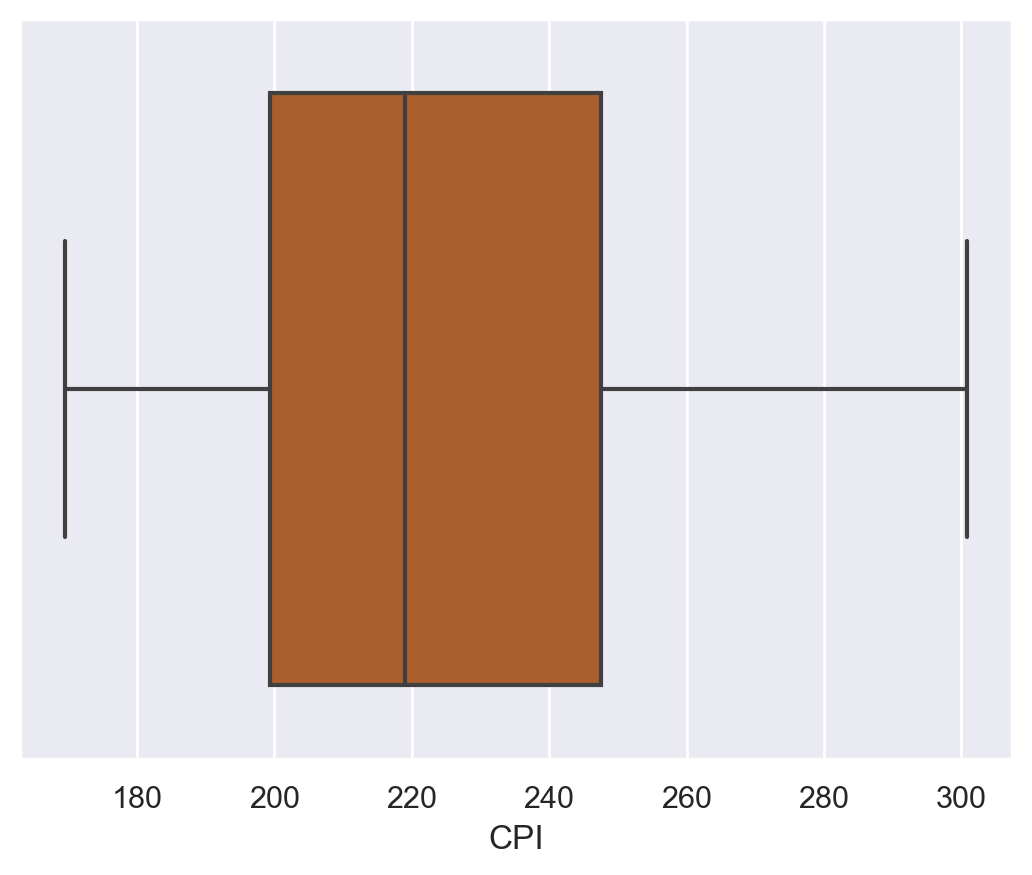

<AxesSubplot:xlabel='Home_price_Index'>

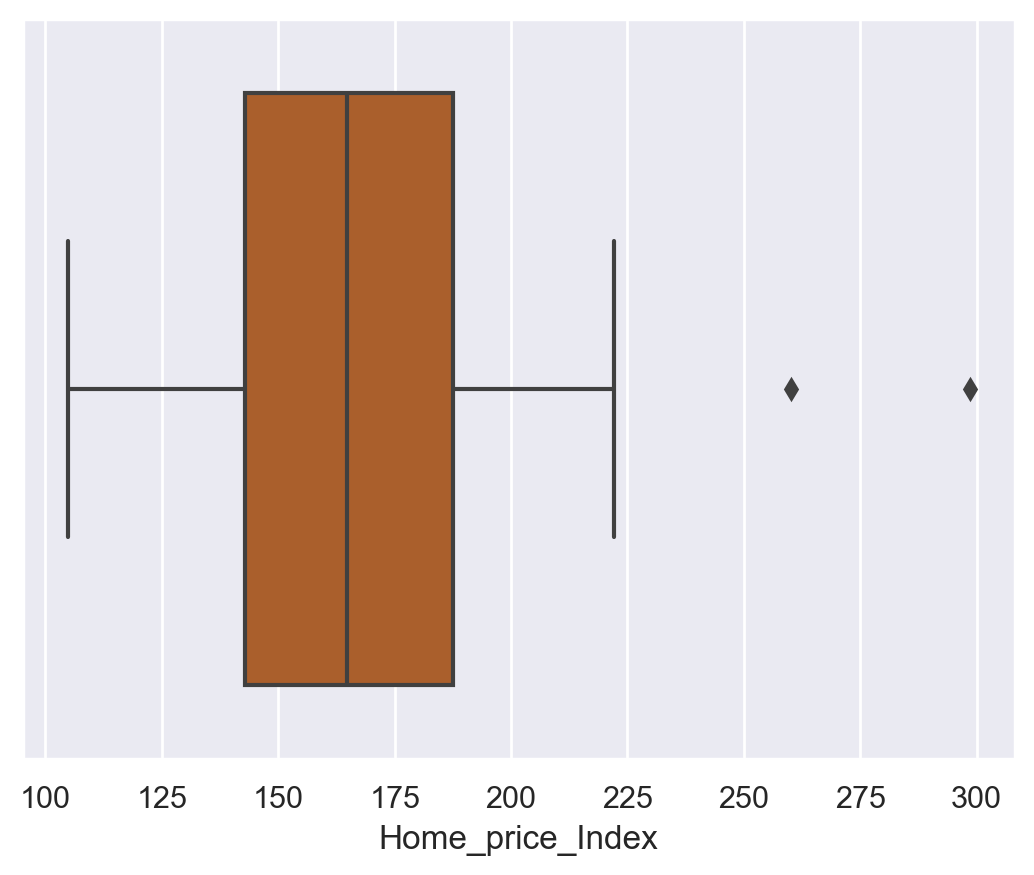

In [17]:
colss= ['Unemployment_RATE','GDP', 'POPTHM','house_tax','TTLCONS','Life_expectancy','MORTGAGE_RATE_US','CPI','Home_price_Index']

for i in colss:
    sns.boxplot(Data1[i])
    plt.show();

In [18]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [19]:
lr,ur=remove_outlier(Data1['Unemployment_RATE'])
print('Lower Range of Unemployment_RATE :',lr,'\nUpper Range of Unemployment_RATE :',ur)
Data1['Unemployment_RATE']=np.where(Data1['Unemployment_RATE']>ur,ur,Data1['Unemployment_RATE'])
Data1['Unemployment_RATE']=np.where(Data1['Unemployment_RATE']<lr,lr,Data1['Unemployment_RATE'])
lr,ur=remove_outlier(Data1['GDP'])
print('Lower Range of GDP :',lr,'\nUpper Range of GDP :',ur)
Data1['GDP']=np.where(Data1['GDP']>ur,ur,Data1['GDP'])
Data1['GDP']=np.where(Data1['GDP']<lr,lr,Data1['GDP'])
lr,ur=remove_outlier(Data1['POPTHM'])
print('Lower Range of POPTHM:',lr,'\nUpper Range of POPTHM:',ur)
Data1['POPTHM']=np.where(Data1['POPTHM']>ur,ur,Data1['POPTHM'])
Data1['POPTHM']=np.where(Data1['POPTHM']<lr,lr,Data1['POPTHM'])
lr,ur=remove_outlier(Data1['house_tax'])
print('Lower Range of house_tax :',lr,'\nUpper Range of house_tax :',ur)
Data1['house_tax']=np.where(Data1['house_tax']>ur,ur,Data1['house_tax'])
Data1['house_tax']=np.where(Data1['house_tax']<lr,lr,Data1['house_tax'])
lr,ur=remove_outlier(Data1['TTLCONS'])
print('Lower Range of TTLCONS :',lr,'\nUpper Range of TTLCONS :',ur)
Data1['TTLCONS']=np.where(Data1['TTLCONS']>ur,ur,Data1['TTLCONS'])
Data1['TTLCONS']=np.where(Data1['TTLCONS']<lr,lr,Data1['TTLCONS'])
lr,ur=remove_outlier(Data1['Life_expectancy'])
print('Lower Range of Life_expectancy :',lr,'\nUpper Range of Life_expectancy :',ur)
Data1['Life_expectancy']=np.where(Data1['Life_expectancy']>ur,ur,Data1['Life_expectancy'])
Data1['Life_expectancy']=np.where(Data1['Life_expectancy']<lr,lr,Data1['Life_expectancy'])
lr,ur=remove_outlier(Data1['MORTGAGE_RATE_US'])
print('Lower Range of MORTGAGE_RATE_US :',lr,'\nUpper Range of MORTGAGE_RATE_US :',ur)
Data1['MORTGAGE_RATE_US']=np.where(Data1['MORTGAGE_RATE_US']>ur,ur,Data1['MORTGAGE_RATE_US'])
Data1['MORTGAGE_RATE_US']=np.where(Data1['MORTGAGE_RATE_US']<lr,lr,Data1['MORTGAGE_RATE_US'])
lr,ur=remove_outlier(Data1['CPI'])
print('Lower Range of CPI :',lr,'\nUpper Range of CPI :',ur)
Data1['CPI']=np.where(Data1['CPI']>ur,ur,Data1['CPI'])
Data1['CPI']=np.where(Data1['CPI']<lr,lr,Data1['CPI'])
lr,ur=remove_outlier(Data1['Home_price_Index'])
print('Lower Range of Home_price_Index:',lr,'\nUpper Range of Home_price_Index :',ur)
Data1['Home_price_Index']=np.where(Data1['Home_price_Index']>ur,ur,Data1['Home_price_Index'])
Data1['Home_price_Index']=np.where(Data1['Home_price_Index']<lr,lr,Data1['Home_price_Index'])



Lower Range of Unemployment_RATE : 1.3937500000000025 
Upper Range of Unemployment_RATE : 9.977083333333331
Lower Range of GDP : 4939.1433124999985 
Upper Range of GDP : 27574.4678125
Lower Range of POPTHM: 254911.47916666672 
Upper Range of POPTHM: 368228.3125
Lower Range of house_tax : -2306.25 
Upper Range of house_tax : 5559.75
Lower Range of TTLCONS : 301441.6458333334 
Upper Range of TTLCONS : 1823004.8125
Lower Range of Life_expectancy : 75.50000000000014 
Upper Range of Life_expectancy : 80.52439024390233
Lower Range of MORTGAGE_RATE_US : 0.9687572568940492 
Upper Range of MORTGAGE_RATE_US : 8.93386611030479
Lower Range of CPI : 127.18906249999999 
Upper Range of CPI : 319.8515625
Lower Range of Home_price_Index: 75.91016666666671 
Upper Range of Home_price_Index : 254.35683333333333


After Treatment of outlier

<AxesSubplot:xlabel='Unemployment_RATE'>

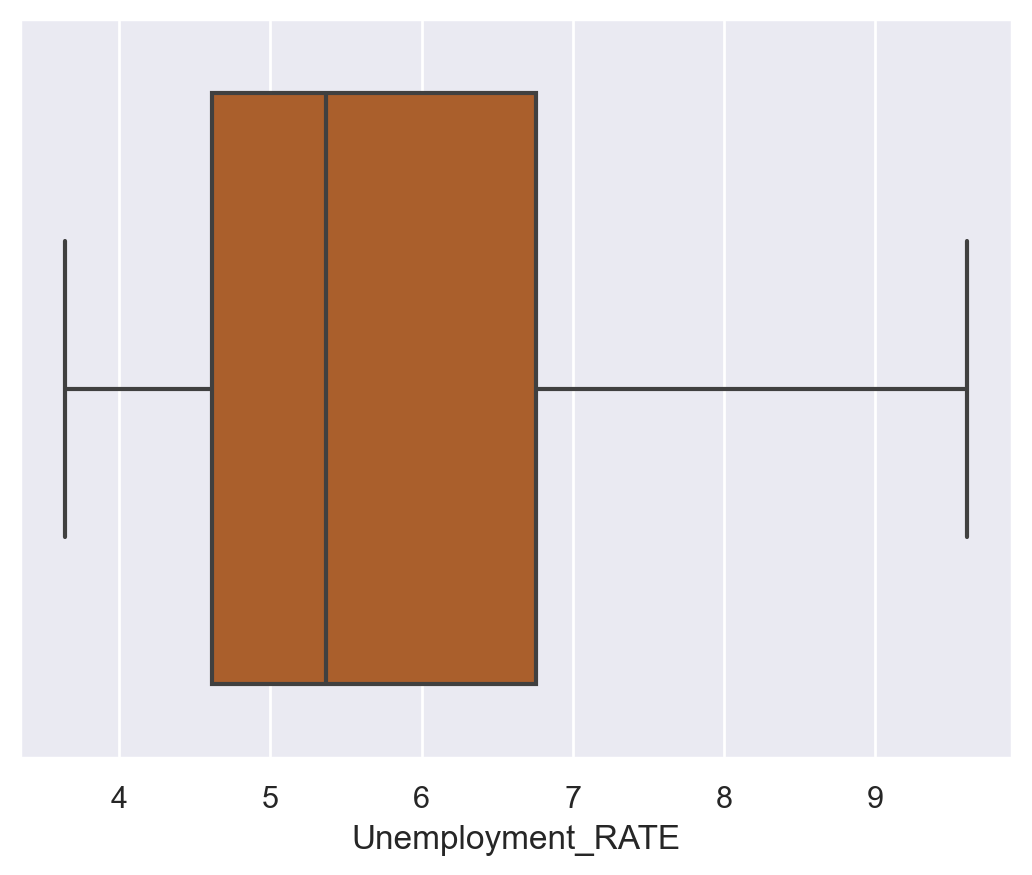

<AxesSubplot:xlabel='GDP'>

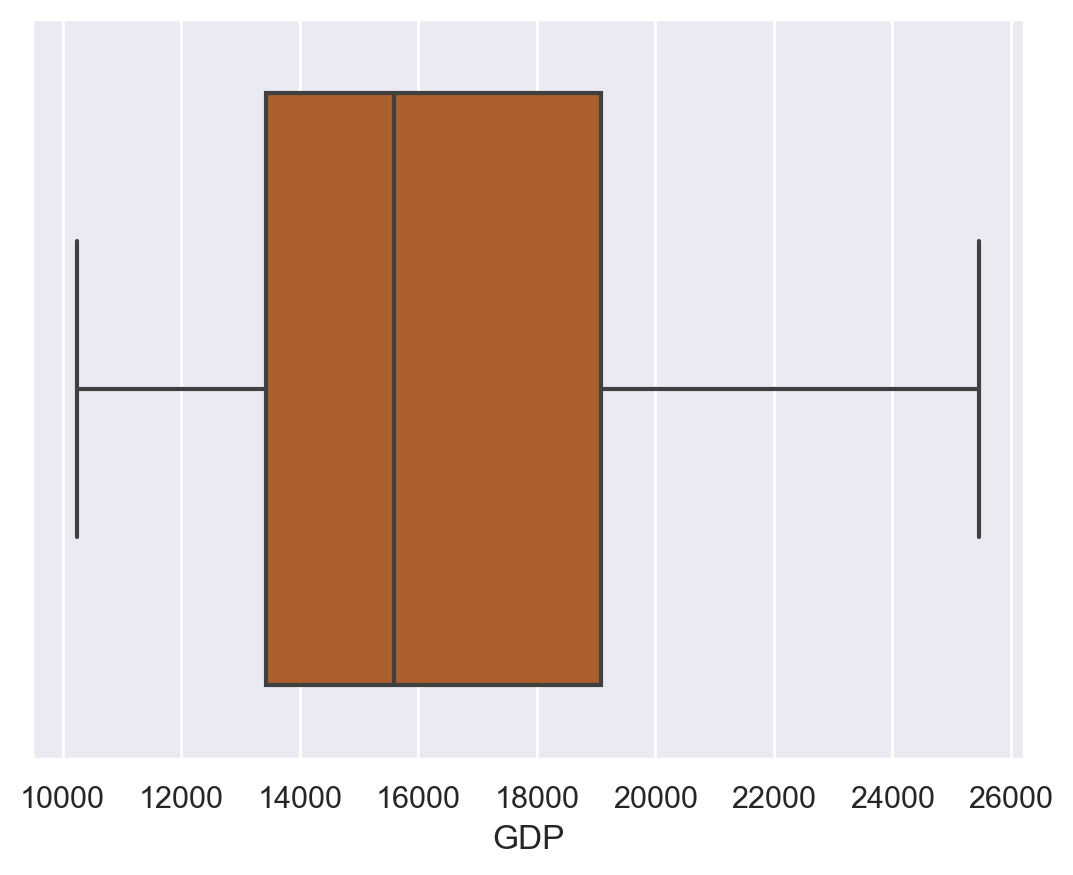

<AxesSubplot:xlabel='POPTHM'>

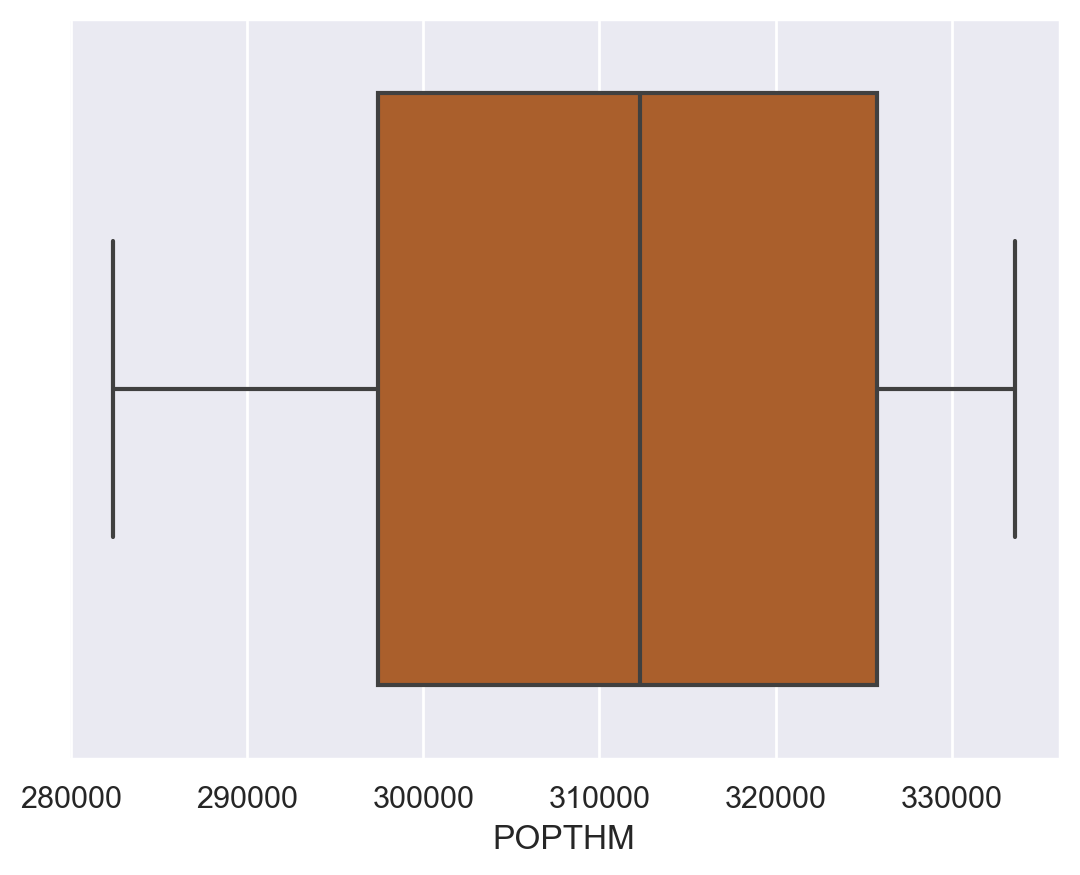

<AxesSubplot:xlabel='house_tax'>

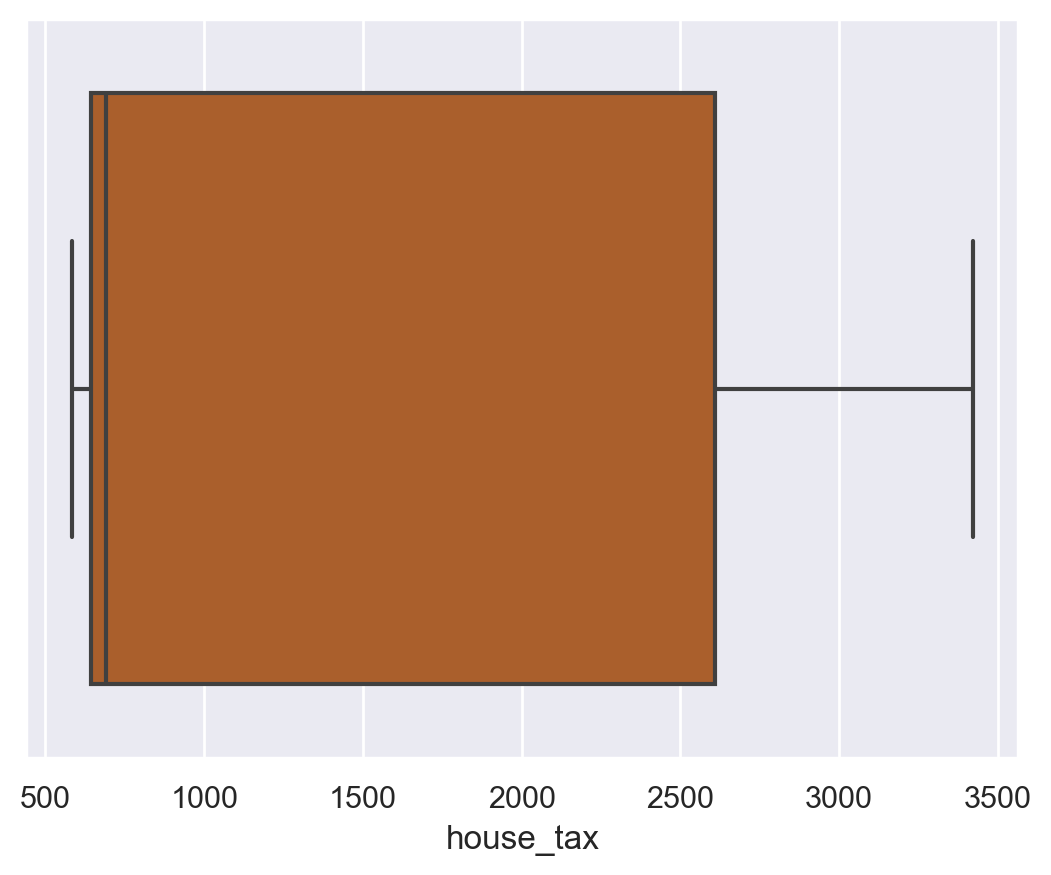

<AxesSubplot:xlabel='TTLCONS'>

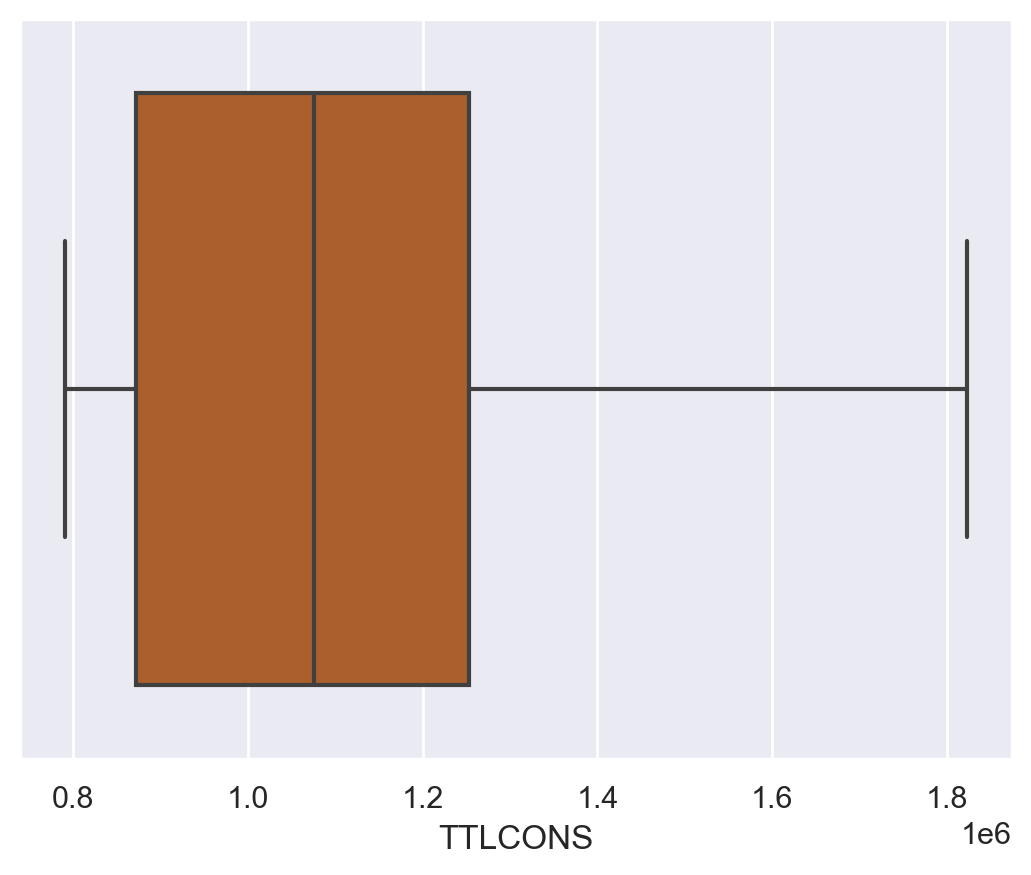

<AxesSubplot:xlabel='Life_expectancy'>

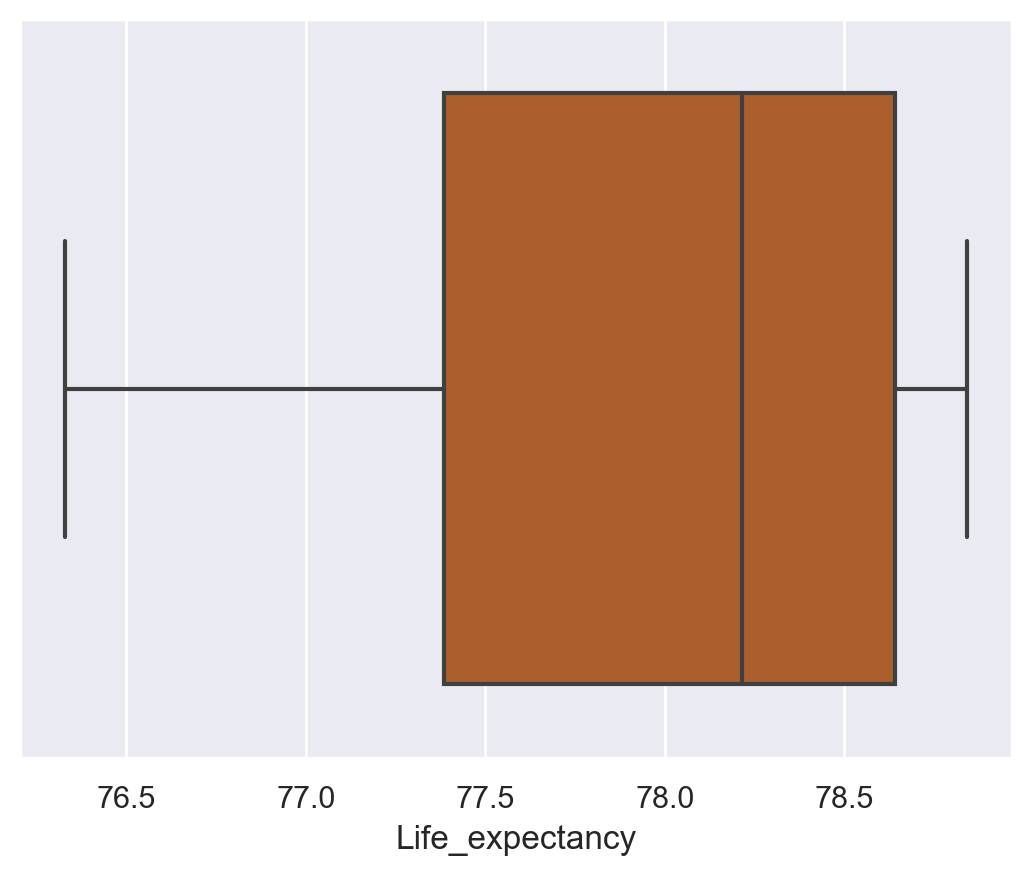

<AxesSubplot:xlabel='MORTGAGE_RATE_US'>

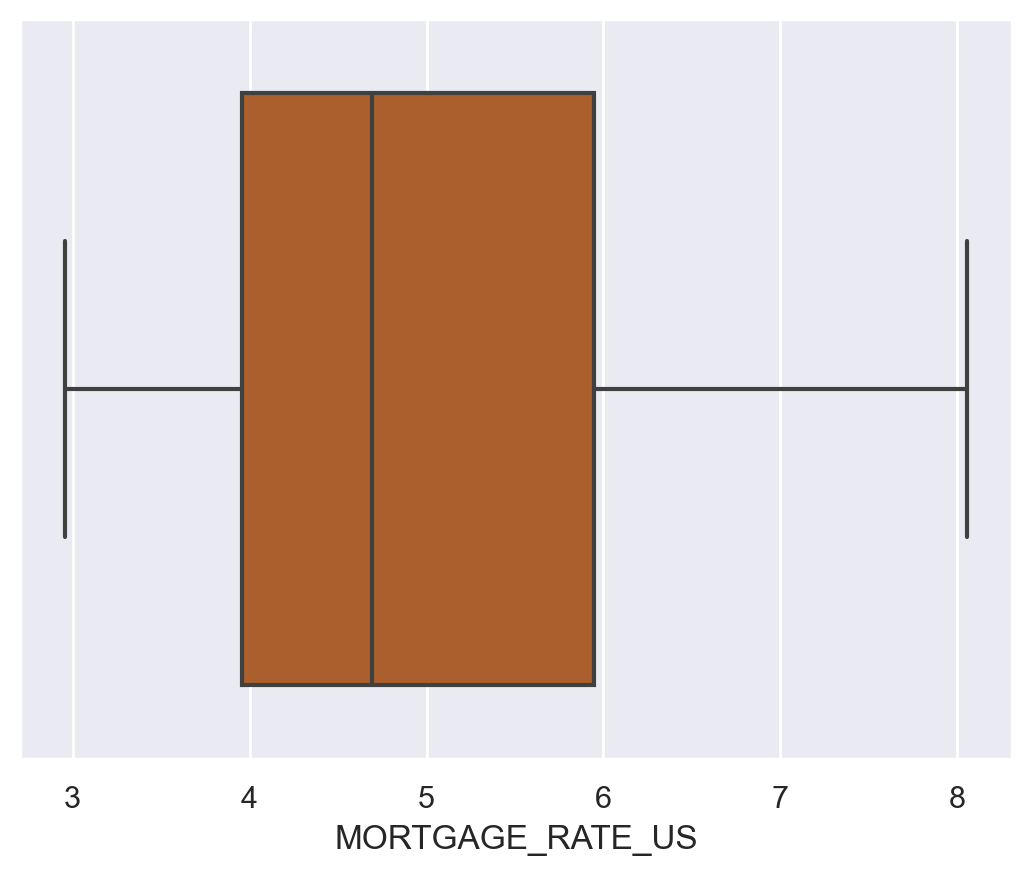

<AxesSubplot:xlabel='CPI'>

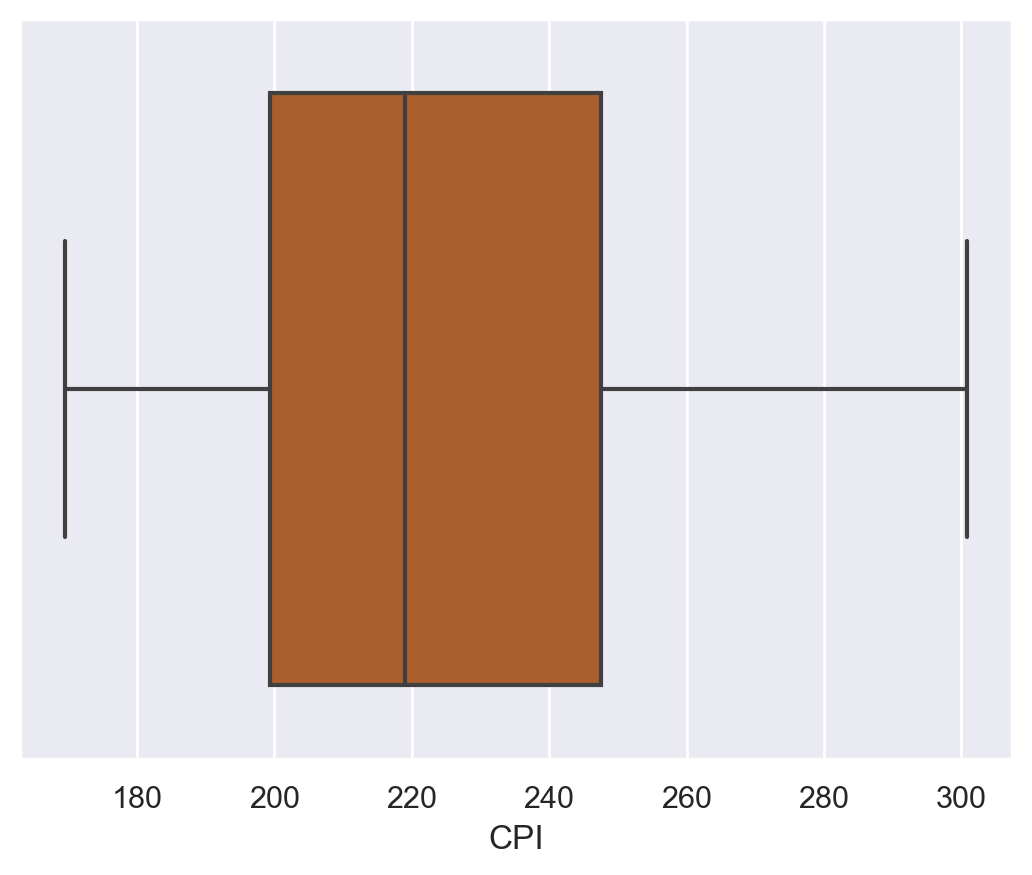

<AxesSubplot:xlabel='Home_price_Index'>

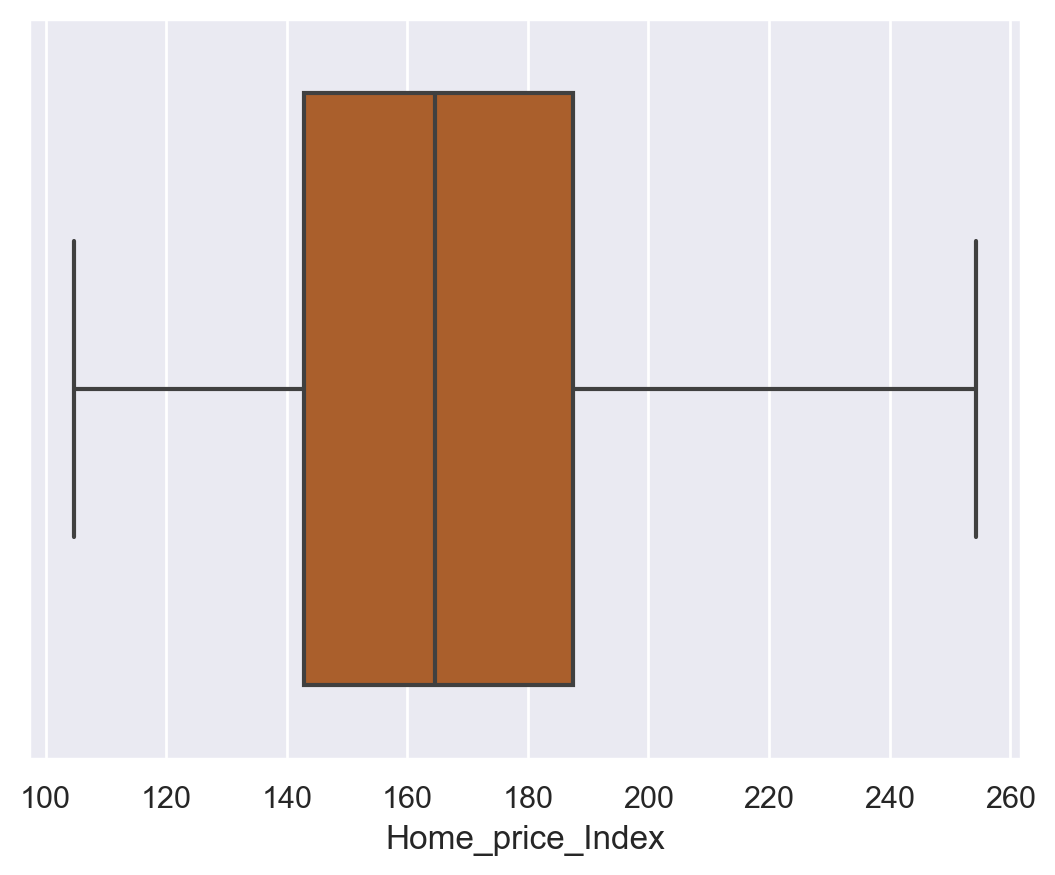

In [20]:
colss= ['Unemployment_RATE','GDP', 'POPTHM','house_tax','TTLCONS','Life_expectancy','MORTGAGE_RATE_US','CPI','Home_price_Index']

for i in colss:
    sns.boxplot(Data1[i])
    plt.show();

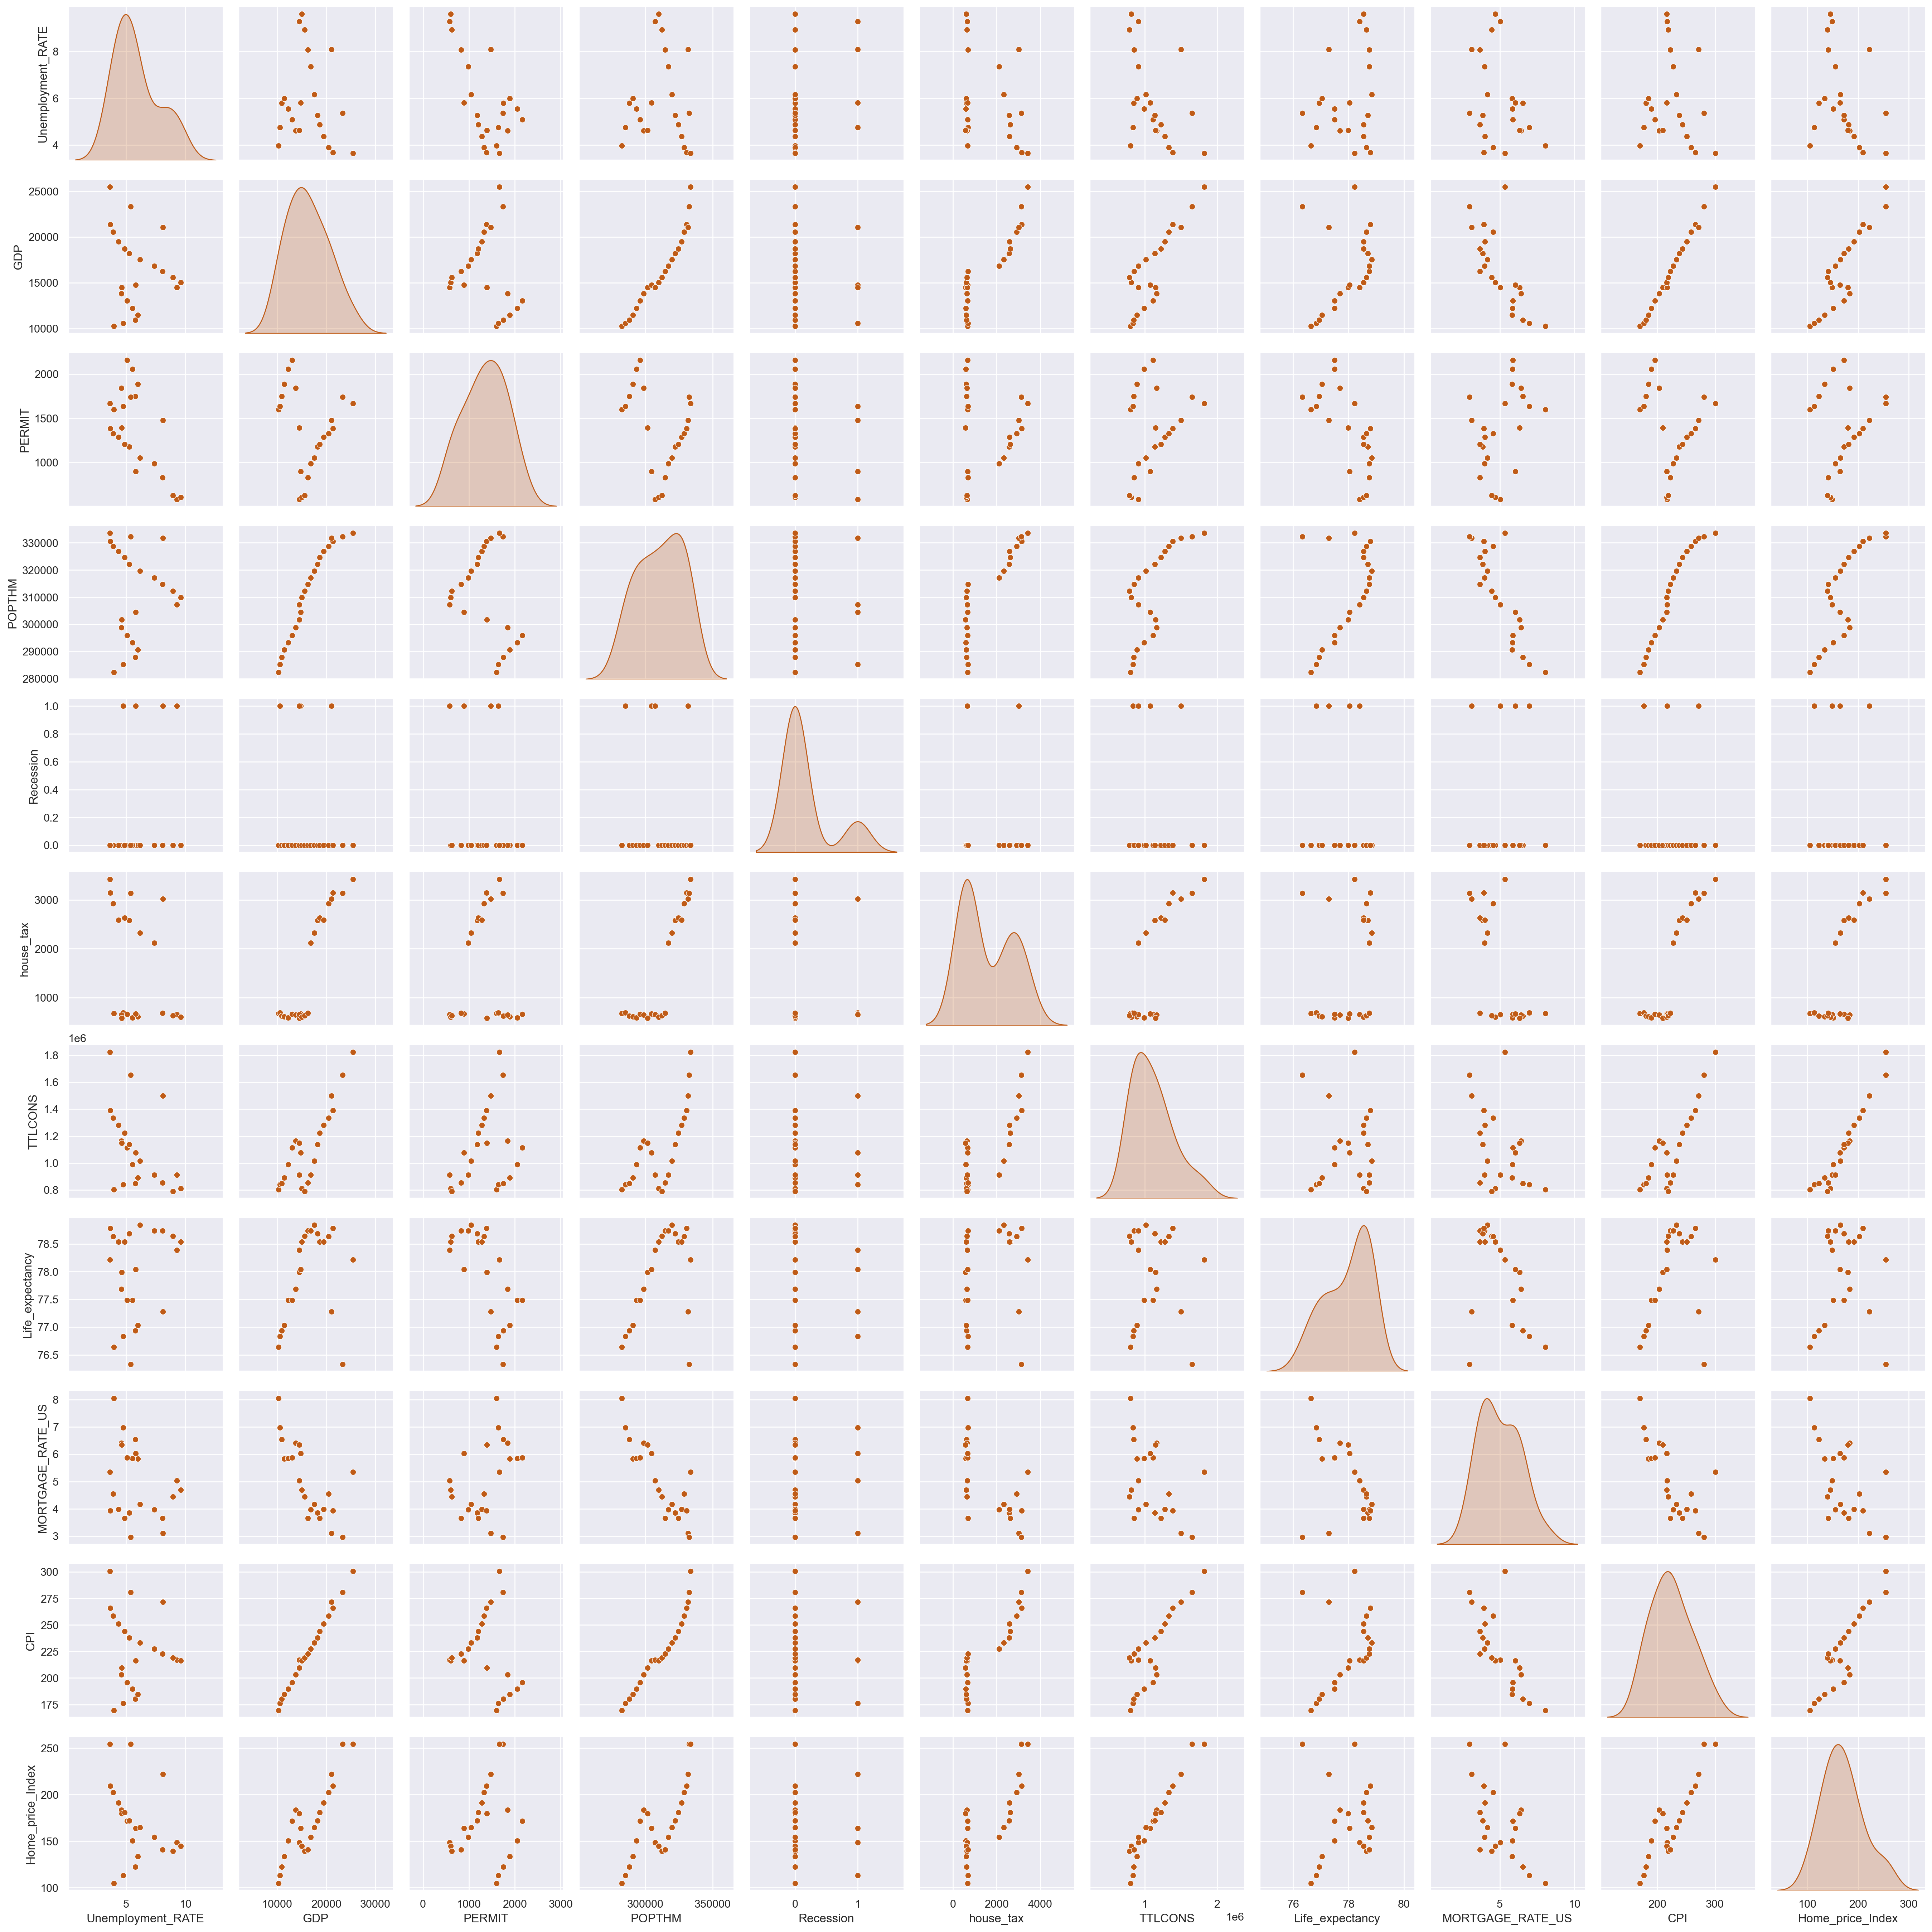

In [22]:
sns.pairplot(Data1,diag_kind='kde');

From above pair plot we can see the how data distrubted for past 20 years.

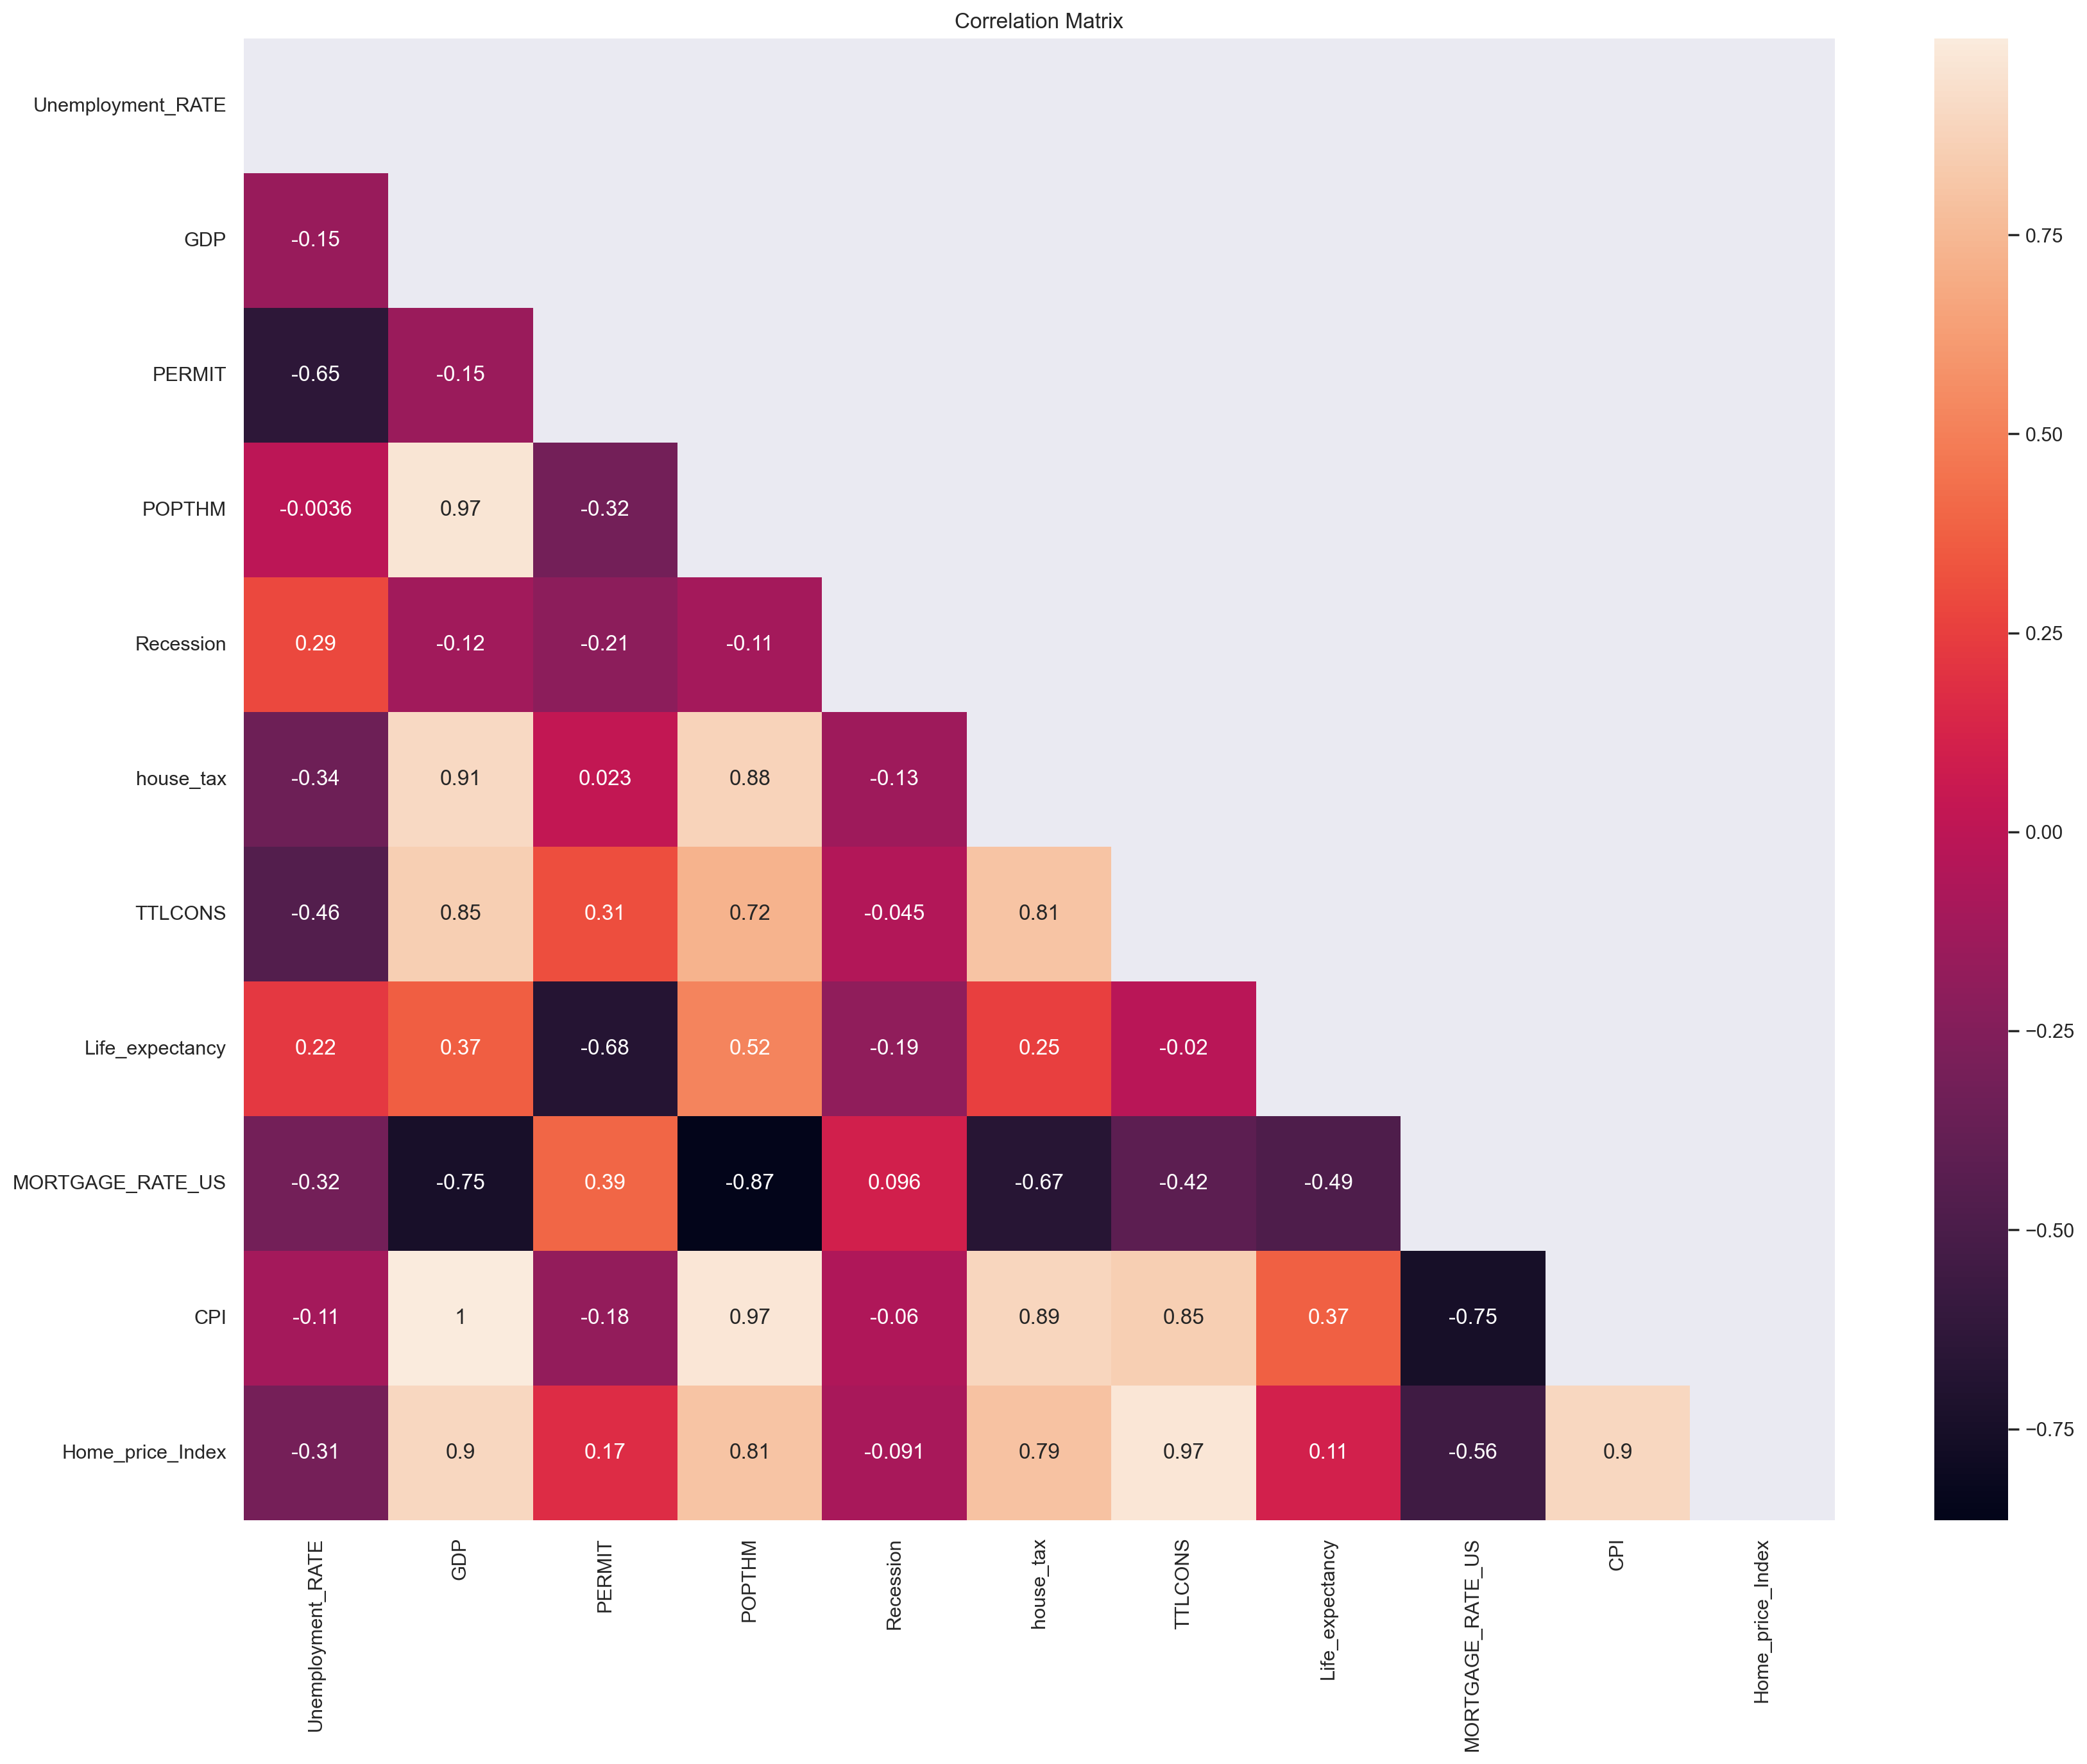

In [23]:
corr=Data1.corr()

# Getting the Upper Triangle of the co-relation matrix
UpperT = np.triu(corr)
plt.figure(figsize=(20,15))
plt.title('Correlation Matrix')
sns.heatmap(corr, mask=UpperT,annot=True)
plt.show();

from above heat map we can able to see correlation of the features

# Lets build a model now

In [24]:
X= Data1.drop('Home_price_Index',axis=1)
Y=Data1['Home_price_Index']

In [25]:
X.head()


,Unemployment_RATE,GDP,PERMIT,POPTHM,Recession,house_tax,TTLCONS,Life_expectancy,MORTGAGE_RATE_US,CPI
0,3.966667,10250.95200,1598.333333,282398.416667,0,681.0,803704.500000,76.636585,8.053462,169.575000
1,4.741667,10581.92900,1637.166667,285225.166667,1,696.0,839778.333333,76.836585,6.967885,176.350000
2,5.783333,10929.10825,1749.000000,287954.583333,0,626.0,848339.500000,76.936585,6.537308,180.258333
3,5.991667,11456.44950,1888.416667,290626.250000,0,611.0,890520.833333,77.036585,5.826981,184.800000
4,5.541667,12217.19575,2057.583333,293262.333333,0,595.0,989220.000000,77.487805,5.839231,189.541667


In [26]:
Y.head()

0    104.777000
1    113.185500
2    122.287667
3    133.741500
4    150.464333
Name: Home_price_Index, dtype: float64

# Train and Test the split data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)


# Linear Regression Model


In [29]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)
regression_model.score(X_test,Y_test)


LinearRegression()

0.8585127670002723

In [34]:
y_pred = regression_model.predict(X_test)
y_pred

array([246.30820814, 200.47596344, 131.38952458, 143.46062329,
       203.17335245, 191.54473736, 142.12725669])

In [36]:
# R square on training data
regression_model.score(X_train, Y_train)

0.9957446025586237

In [37]:
# R square on testing data
regression_model.score(X_test, Y_test)

0.8585127670002723

In [38]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, Y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(Y_train,predicted_train))

2.7215757338690807

In [39]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, Y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(Y_test,predicted_test))

11.668563580930575

In [41]:
#MAPE ( Mean Absoulte Percentage Error) for train data
pred=regression_model.predict(X_train)
residual = Y_train - pred
percentage_error = residual / Y_train
np.abs(percentage_error).mean()

0.013713363228328489

In [42]:
#MAPE ( Mean Absoulte Percentage Error)for test data
pred=regression_model.predict(X_test)
residual = Y_test - pred
percentage_error = residual / Y_test
np.abs(percentage_error).mean()

0.050240730287322365

In [60]:
regression_model.coef_

array([ 5.05160513e+00, -2.18120988e-03,  4.02787665e-03,  4.00378234e-03,
       -1.66628988e+00, -9.14334393e-03,  1.98903979e-04, -4.18288301e+00,
        6.07433904e+00, -1.35357741e+00])

# Lets try K Fold cross validation to measure accuracy of our LinearRegression model

In [66]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.78308405, 0.82319374, 0.76050151, 0.9432648 , 0.92941157])

##### from abaove data We can able see  that we get a score above 70% all the time. its best fit model from this coeficent value we can able to finds factors impacting home price


# Insights from data analysis aand  Factors impacting Home Price in USA Market

After gathering data and made an analysis on the data .I have done the data preprocessing and visualize  how the data is represented and varies from past 20 years.And i have treated null values and outlier for the data and  making data as fit to build model.For building a model need to chooses the model based on the data.where our data is continues.So I have used linear regression model for our data from that we can able to find out which is main factor affecting home price on US market for past 20 years.From linear regression model we able to find that factor that impacting house price in USA real Estate marketbased on co-efficent value of model.From our model Mortgage Rate us is impacting factor for home price in usa market.Mortgage rate means the interest rate charged for a home loan. Mortgage rates can either be fixed at a specific interest rate, or variable, fluctuating with a benchmark interest rate. Potential homebuyers can keep an eye on trends in mortgage rates by watching the prime rate and the 10-year Treasury bond yield.Main factors influecing like economic strength, Inflation,Government Policy,supply demand,credit risk,loan period.Mortgage mainly go up and down based on the following Effect of inflation on mortgage rates,Effect of the strength of the economy,Current scenario of the housing market,The Federal Reserve,The bond market.we can be able to lower interest rate and reduce mortgage payments like Shop for mortgage rates,Improve your credit score,Choose your loan term carefully,Make a larger down payment,Buy mortgage points,Lock in your mortgage rate,Refinance your mortgage.Based on all these factors Mortgage rate will increase and decrease from this mortgage rate impacts home price in USA Real Estate.

----------------------------------------------------------------------------THANK YOU---------------------------------------------------------------------------------------------------